#Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

#Assumptions:

As the users are regular people, the weekends are supposed to on Saturdays and Sundays...The Data shows weekend as Mondays and Tuesdays
We have fixed the data as it was misleading

#Import Libraries

In [2]:
import numpy as np
from numpy import median,mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

import datetime
from datetime import timedelta, date

#Helper Functions

In [3]:
def funcRangeCat(initialValue,value,increment,Prefix):
  arr = np.arange(initialValue,value + increment + 1,increment)
  cat = str(arr[-2]) + '-' + str(arr[-1])
  #return cat
  return Prefix + str(len(arr)) + '[' + cat + ']'

#Load the file day.csv into a dataframe named bike

In [4]:
bike = pd.read_csv('day.csv') 
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#Data Cleaning
**Inproper data spotted**

Weekday 6 and 0 are having workingday as 0, assuming it to be weekends.
But all the weekdays marked as 6 and 0 are Monday and Tuesday respectively and all Mondays and Tuesdays cannot be holiday.

Hence, data needs to be corrected

Weekday column is incorrect

6 should be changed to 0 (Monday)
0 should be changed to 1 (Tuesday)
1 should be changed to 2 (Wednesday)
2 should be changed to 3 (Thursday)
3 should be changed to 4 (Friday)
4 should be changed to 5 (Saturday)
5 should be changed to 6 (Sunday) 


After fixing the above field change the workingday logic to below,

- if holiday = 1 or Weekday = 5 or Weekday = 5 then Workingday = 0
- else Workingday = 1

In [5]:
bike["weekday"] = bike["weekday"].map({1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 0, 0: 1})
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,1,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,2,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,3,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,4,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##Correcting workingday

After fixing the weekday, need to change the workingday logic to below,

- if holiday = 1 or Weekday = 5 or Weekday = 6 then Workingday = 0
- else Workingday = 1

In [6]:
bike["workingday"] = bike.apply(lambda x: 0 if (x["holiday"] == 1) or (x["weekday"] in [5,6]) else 1, axis = 1)
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,0,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,1,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,2,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,3,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,4,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#Check the number of rows and columns in the dataset

In [7]:
bike.shape

(730, 16)

In [8]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.990411,0.691781,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.003061,0.462074,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##Check for null valued columns

In [9]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
bike.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Check for the Datatypes associated with the variables

In [11]:
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

##Convert dteday to datetime datatype

In [12]:
#bike["dteday"] = pd.to_datetime(bike["dteday"])

bike["dteday"] = bike["dteday"].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%Y')   )

bike.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

#Derived Binary Variables (0/1)

##Derived Variable **IsEitherWeekendOrHoliday**

It is marked as Y if it is not an working day, either it is weekend (Sat or Sun) or a declared holiday on non-weekend days

In [13]:
bike = bike.sort_values("dteday").reset_index()
bike["IsEitherWeekendOrHoliday"] = bike[["holiday","workingday"]].apply(lambda x: 1 if x[0] == 1 or x[1] == 0 else 0 , axis = 1)
bike

,index,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,IsEitherWeekendOrHoliday
0,0,1,2018-01-01,1,0,1,0,0,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,1,2,2018-01-02,1,0,1,0,1,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0
2,2,3,2018-01-03,1,0,1,0,2,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0
3,3,4,2018-01-04,1,0,1,0,3,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0
4,4,5,2018-01-05,1,0,1,0,4,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,725,726,2019-12-27,1,1,12,0,5,0,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114,1
726,726,727,2019-12-28,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095,1
727,727,728,2019-12-29,1,1,12,0,0,1,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341,0
728,728,729,2019-12-30,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,0


##Derived Variables: 

1.    **IsDayPlus1Holiday**
2.    **IsDayPlus2Holiday**
3.    **IsDayPlus3Holiday**
4.    **IsDayPlus4Holiday**
5.    **IsDayPlus5Holiday**
6.    **IsDayPlus6Holiday**
7.    **IsDayPlus7Holiday**
8.    **IsDayMinus1Holiday**
9.    **IsDayMinus2Holiday**
10.   **IsDayMinus3Holiday**
11.   **IsDayMinus4Holiday**
12.   **IsDayMinus5Holiday**
13.   **IsDayMinus6Holiday**
14.   **IsDayMinus7Holiday**


**What these columns store?**
Reason for this derived columns is to give an indication when is the next holiday, is it next day or day after or 2 days after and so on...
or was it 1day before, 2 day before and so on...

**Why these columns?**
Generally if a Friday is a holiday, people tend to take an additional day or two off by applying leave.Sometimes if Thursdaya nd Friday are holidays, people tend to take the entire week off or just wedsnesday off.

This can impact the bike rentals

In [14]:
#bike["dteday"] + timedelta(days=1)
bike_temporary_all_days = pd.DataFrame()
bike_temporary_all_days[["dteday_y","IsEitherWeekendOrHoliday_y"] ]= bike.loc[:,["dteday","IsEitherWeekendOrHoliday"]]
bike["IsDayPlus1Holiday"] = bike.merge(bike_temporary_all_days, left_on=bike["dteday"] + timedelta(days=1), right_on=bike_temporary_all_days["dteday_y"], how='left')["IsEitherWeekendOrHoliday_y"].fillna(0).astype('int')
bike["IsDayPlus2Holiday"] = bike.merge(bike_temporary_all_days, left_on=bike["dteday"] + timedelta(days=2), right_on=bike_temporary_all_days["dteday_y"], how='left')["IsEitherWeekendOrHoliday_y"].fillna(0).astype('int')
bike["IsDayPlus3Holiday"] = bike.merge(bike_temporary_all_days, left_on=bike["dteday"] + timedelta(days=3), right_on=bike_temporary_all_days["dteday_y"], how='left')["IsEitherWeekendOrHoliday_y"].fillna(0).astype('int')
bike["IsDayPlus4Holiday"] = bike.merge(bike_temporary_all_days, left_on=bike["dteday"] + timedelta(days=4), right_on=bike_temporary_all_days["dteday_y"], how='left')["IsEitherWeekendOrHoliday_y"].fillna(0).astype('int')
bike["IsDayPlus5Holiday"] = bike.merge(bike_temporary_all_days, left_on=bike["dteday"] + timedelta(days=5), right_on=bike_temporary_all_days["dteday_y"], how='left')["IsEitherWeekendOrHoliday_y"].fillna(0).astype('int')
bike["IsDayPlus6Holiday"] = bike.merge(bike_temporary_all_days, left_on=bike["dteday"] + timedelta(days=6), right_on=bike_temporary_all_days["dteday_y"], how='left')["IsEitherWeekendOrHoliday_y"].fillna(0).astype('int')
bike["IsDayPlus7Holiday"] = bike.merge(bike_temporary_all_days, left_on=bike["dteday"] + timedelta(days=7), right_on=bike_temporary_all_days["dteday_y"], how='left')["IsEitherWeekendOrHoliday_y"].fillna(0).astype('int')

bike["IsDayMinus1Holiday"] = bike.merge(bike_temporary_all_days, left_on=bike["dteday"] - timedelta(days=1), right_on=bike_temporary_all_days["dteday_y"], how='left')["IsEitherWeekendOrHoliday_y"].fillna(0).astype('int')
bike["IsDayMinus2Holiday"] = bike.merge(bike_temporary_all_days, left_on=bike["dteday"] - timedelta(days=2), right_on=bike_temporary_all_days["dteday_y"], how='left')["IsEitherWeekendOrHoliday_y"].fillna(0).astype('int')
bike["IsDayMinus3Holiday"] = bike.merge(bike_temporary_all_days, left_on=bike["dteday"] - timedelta(days=3), right_on=bike_temporary_all_days["dteday_y"], how='left')["IsEitherWeekendOrHoliday_y"].fillna(0).astype('int')
bike["IsDayMinus4Holiday"] = bike.merge(bike_temporary_all_days, left_on=bike["dteday"] - timedelta(days=4), right_on=bike_temporary_all_days["dteday_y"], how='left')["IsEitherWeekendOrHoliday_y"].fillna(0).astype('int')
bike["IsDayMinus5Holiday"] = bike.merge(bike_temporary_all_days, left_on=bike["dteday"] - timedelta(days=5), right_on=bike_temporary_all_days["dteday_y"], how='left')["IsEitherWeekendOrHoliday_y"].fillna(0).astype('int')
bike["IsDayMinus6Holiday"] = bike.merge(bike_temporary_all_days, left_on=bike["dteday"] - timedelta(days=6), right_on=bike_temporary_all_days["dteday_y"], how='left')["IsEitherWeekendOrHoliday_y"].fillna(0).astype('int')
bike["IsDayMinus7Holiday"] = bike.merge(bike_temporary_all_days, left_on=bike["dteday"] - timedelta(days=7), right_on=bike_temporary_all_days["dteday_y"], how='left')["IsEitherWeekendOrHoliday_y"].fillna(0).astype('int')

bike.head(10)

,index,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,...,IsDayPlus5Holiday,IsDayPlus6Holiday,IsDayPlus7Holiday,IsDayMinus1Holiday,IsDayMinus2Holiday,IsDayMinus3Holiday,IsDayMinus4Holiday,IsDayMinus5Holiday,IsDayMinus6Holiday,IsDayMinus7Holiday
0,0,1,2018-01-01,1,0,1,0,0,1,2,...,1,1,0,0,0,0,0,0,0,0
1,1,2,2018-01-02,1,0,1,0,1,1,2,...,1,0,0,0,0,0,0,0,0,0
2,2,3,2018-01-03,1,0,1,0,2,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3,4,2018-01-04,1,0,1,0,3,1,1,...,0,0,0,0,0,0,0,0,0,0
4,4,5,2018-01-05,1,0,1,0,4,1,1,...,0,0,0,0,0,0,0,0,0,0
5,5,6,2018-01-06,1,0,1,0,5,0,1,...,0,0,1,0,0,0,0,0,0,0
6,6,7,2018-01-07,1,0,1,0,6,0,2,...,0,1,1,1,0,0,0,0,0,0
7,7,8,2018-01-08,1,0,1,0,0,1,2,...,1,1,0,1,1,0,0,0,0,0
8,8,9,2018-01-09,1,0,1,0,1,1,1,...,1,0,0,0,1,1,0,0,0,0
9,9,10,2018-01-10,1,0,1,0,2,1,1,...,0,0,1,0,0,1,1,0,0,0


##Derived Variable **IsLongWeekend**

This indicates whether the holiday or weekend a part of long weekend

In [15]:

bike["IsLongWeekend"] = bike.apply(lambda x: 1 if (x["IsEitherWeekendOrHoliday"] == 1 and x["IsDayPlus1Holiday"] == 1 and x["IsDayPlus2Holiday"] == 1    ) else 0, axis = 1)

bike["IsLongWeekend"] = bike.apply(lambda x: 1 if (x["IsEitherWeekendOrHoliday"] == 1 and x["IsDayPlus1Holiday"] == 1 and x["IsDayMinus1Holiday"] == 1   ) else x["IsLongWeekend"] , axis = 1)

bike["IsLongWeekend"] = bike.apply(lambda x: 1 if (x["IsEitherWeekendOrHoliday"] == 1 and x["IsDayMinus1Holiday"] == 1 and x["IsDayMinus2Holiday"] == 1   ) else x["IsLongWeekend"] , axis = 1)


bike[bike["IsLongWeekend"] == 1][["dteday","IsEitherWeekendOrHoliday","IsDayPlus1Holiday","IsDayPlus2Holiday","IsDayMinus1Holiday","IsDayMinus2Holiday","IsLongWeekend"]].head(100)





,dteday,IsEitherWeekendOrHoliday,IsDayPlus1Holiday,IsDayPlus2Holiday,IsDayMinus1Holiday,IsDayMinus2Holiday,IsLongWeekend
549,2019-07-04,1,1,1,0,0,1
550,2019-07-05,1,1,0,1,0,1
551,2019-07-06,1,0,0,1,1,1


##Derived Variable **IsWeekend**
If weekday is 5 or 6, we are considering it as Saturday and Sunday respectively and marking it as 1 else 0 (if not weekend)

In [16]:
bike["IsWeekend"] = bike["weekday"].apply(lambda x: 1 if x in [5,6] else 0 )
bike[["IsWeekend","weekday"]]

,IsWeekend,weekday
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
725,1,5
726,1,6
727,0,0
728,0,1


#Derived String Variables

0 (Monday)
1 (Tuesday)
2 (Wednesday)
3 (Thursday)
4 (Friday)
5 (Saturday)
6 (Sunday) 


In [17]:
bike["weekdayText"] = bike["weekday"].map({0: 'IsMonday', 1: 'IsTuesday', 2: 'IsWednesday', 3: 'IsThursday', 4: 'IsFriday', 5: 'IsSaturday', 6: 'IsSunday'})
bike["weekdayText"].value_counts()

IsMonday       105
IsTuesday      105
IsWednesday    105
IsThursday     104
IsSaturday     104
IsSunday       104
IsFriday       103
Name: weekdayText, dtype: int64

#Derived bin Variables

## Derived bin variable: Humidity_Range

In [18]:
bike["hum"].median()

62.625

In [19]:
#funcRangeCat(0,value,increment,Prefix)

bike["humidity_range"] = bike["hum"].apply(lambda x: funcRangeCat(0,x,10,'hum'))
bike[["humidity_range",'hum']]

,humidity_range,hum
0,hum10[80.0-90.0],80.5833
1,hum9[70.0-80.0],69.6087
2,hum6[40.0-50.0],43.7273
3,hum8[60.0-70.0],59.0435
4,hum6[40.0-50.0],43.6957
...,...,...
725,hum8[60.0-70.0],65.2917
726,hum7[50.0-60.0],59.0000
727,hum9[70.0-80.0],75.2917
728,hum6[40.0-50.0],48.3333


## Derived bin variable: Windspeed_Range

In [20]:
bike["windspeed"].value_counts()

9.041918     3
11.166689    3
11.250104    3
15.333486    3
7.959064     3
            ..
12.416775    1
13.833289    1
14.250632    1
23.044181    1
10.374682    1
Name: windspeed, Length: 649, dtype: int64

In [21]:
#funcRangeCat(0,value,increment,Prefix)

bike["windspeed_range"] = bike["windspeed"].apply(lambda x: funcRangeCat(0,x,10,'ws'))
bike[["windspeed_range",'hum']]

,windspeed_range,hum
0,ws3[10.0-20.0],80.5833
1,ws3[10.0-20.0],69.6087
2,ws3[10.0-20.0],43.7273
3,ws3[10.0-20.0],59.0435
4,ws3[10.0-20.0],43.6957
...,...,...
725,ws4[20.0-30.0],65.2917
726,ws3[10.0-20.0],59.0000
727,ws2[0.0-10.0],75.2917
728,ws4[20.0-30.0],48.3333


In [22]:
bike["windspeed_range"].value_counts()

ws3[10.0-20.0]    458
ws2[0.0-10.0]     179
ws4[20.0-30.0]     91
ws5[30.0-40.0]      2
Name: windspeed_range, dtype: int64

#Dummy Variables

## Dummy Variables for the variable Season:
season has values like 1,2,3,4
numeric to string mapping
(1:spring, 2:summer, 3:fall, 4:winter)

Step1: converting numerics to string 
Step2: creating dummy variables where the strings becomes the column name and values are stored as 1s and 0s

In [23]:
bike["season"] = bike["season"].astype('string')
bike["season"] = bike["season"].map({'1': 'IsSpring', '2': 'IsSummer', '3': 'IsFall', '4': 'IsWinter'})
bike["season"].value_counts()

IsFall      188
IsSummer    184
IsSpring    180
IsWinter    178
Name: season, dtype: int64

In [24]:
season = pd.get_dummies(bike["season"],drop_first = True)
bike = pd.concat([bike,season],axis = 1)
bike

,index,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,...,IsDayMinus6Holiday,IsDayMinus7Holiday,IsLongWeekend,IsWeekend,weekdayText,humidity_range,windspeed_range,IsSpring,IsSummer,IsWinter
0,0,1,2018-01-01,IsSpring,0,1,0,0,1,2,...,0,0,0,0,IsMonday,hum10[80.0-90.0],ws3[10.0-20.0],1,0,0
1,1,2,2018-01-02,IsSpring,0,1,0,1,1,2,...,0,0,0,0,IsTuesday,hum9[70.0-80.0],ws3[10.0-20.0],1,0,0
2,2,3,2018-01-03,IsSpring,0,1,0,2,1,1,...,0,0,0,0,IsWednesday,hum6[40.0-50.0],ws3[10.0-20.0],1,0,0
3,3,4,2018-01-04,IsSpring,0,1,0,3,1,1,...,0,0,0,0,IsThursday,hum8[60.0-70.0],ws3[10.0-20.0],1,0,0
4,4,5,2018-01-05,IsSpring,0,1,0,4,1,1,...,0,0,0,0,IsFriday,hum6[40.0-50.0],ws3[10.0-20.0],1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,725,726,2019-12-27,IsSpring,1,12,0,5,0,2,...,1,1,0,1,IsSaturday,hum8[60.0-70.0],ws4[20.0-30.0],1,0,0
726,726,727,2019-12-28,IsSpring,1,12,0,6,0,2,...,0,1,0,1,IsSunday,hum7[50.0-60.0],ws3[10.0-20.0],1,0,0
727,727,728,2019-12-29,IsSpring,1,12,0,0,1,2,...,0,0,0,0,IsMonday,hum9[70.0-80.0],ws2[0.0-10.0],1,0,0
728,728,729,2019-12-30,IsSpring,1,12,0,1,1,1,...,0,0,0,0,IsTuesday,hum6[40.0-50.0],ws4[20.0-30.0],1,0,0


## Dummy Variables for the variable weathersit:
**IsWeatherGreat**
**IsWeatherOk**
**IsWeatherBad**
**IsWeatherWorst**

weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy (**We are considering it as IsWeatherGreat**)
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (**We are considering it as IsWeatherOk**)
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (**We are considering it as IsWeatherBad**)
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (**We are considering it as IsWeatherWorst**)

Step1: converting numerics to string 
Step2: creating dummy variables where the strings becomes the column name and values are stored as 1s and 0s



In [25]:
bike["weathersit"] = bike["weathersit"].astype('string')
bike["weathersit"] = bike["weathersit"].map({'1': 'IsWeatherGreat', '2': 'IsWeatherOk', '3': 'IsWeatherBad', '4': 'IsWeatherWorst'})
bike["weathersit"].value_counts()

IsWeatherGreat    463
IsWeatherOk       246
IsWeatherBad       21
Name: weathersit, dtype: int64

In [26]:
weathersit = pd.get_dummies(bike["weathersit"],drop_first = True)
bike = pd.concat([bike,weathersit],axis = 1)
bike

,index,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,...,IsLongWeekend,IsWeekend,weekdayText,humidity_range,windspeed_range,IsSpring,IsSummer,IsWinter,IsWeatherGreat,IsWeatherOk
0,0,1,2018-01-01,IsSpring,0,1,0,0,1,IsWeatherOk,...,0,0,IsMonday,hum10[80.0-90.0],ws3[10.0-20.0],1,0,0,0,1
1,1,2,2018-01-02,IsSpring,0,1,0,1,1,IsWeatherOk,...,0,0,IsTuesday,hum9[70.0-80.0],ws3[10.0-20.0],1,0,0,0,1
2,2,3,2018-01-03,IsSpring,0,1,0,2,1,IsWeatherGreat,...,0,0,IsWednesday,hum6[40.0-50.0],ws3[10.0-20.0],1,0,0,1,0
3,3,4,2018-01-04,IsSpring,0,1,0,3,1,IsWeatherGreat,...,0,0,IsThursday,hum8[60.0-70.0],ws3[10.0-20.0],1,0,0,1,0
4,4,5,2018-01-05,IsSpring,0,1,0,4,1,IsWeatherGreat,...,0,0,IsFriday,hum6[40.0-50.0],ws3[10.0-20.0],1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,725,726,2019-12-27,IsSpring,1,12,0,5,0,IsWeatherOk,...,0,1,IsSaturday,hum8[60.0-70.0],ws4[20.0-30.0],1,0,0,0,1
726,726,727,2019-12-28,IsSpring,1,12,0,6,0,IsWeatherOk,...,0,1,IsSunday,hum7[50.0-60.0],ws3[10.0-20.0],1,0,0,0,1
727,727,728,2019-12-29,IsSpring,1,12,0,0,1,IsWeatherOk,...,0,0,IsMonday,hum9[70.0-80.0],ws2[0.0-10.0],1,0,0,0,1
728,728,729,2019-12-30,IsSpring,1,12,0,1,1,IsWeatherGreat,...,0,0,IsTuesday,hum6[40.0-50.0],ws4[20.0-30.0],1,0,0,1,0


## Dummy Variables for the variable mnth (month of the year):
**IsJan**
**IsFeb**
**IsMar**
**IsApr**
**IsMay**
**IsJun**
**IsJul**
**IsAug**
**IsSep**
**IsOct**
**IsNov**
**IsDec**


In [27]:
bike["mnth"] = bike["mnth"].astype('string')
bike["mnth"] = bike["mnth"].map({'1': 'IsJan', '2': 'IsFeb', '3': 'IsMar', '4': 'IsApr','5': 'IsMay', '6': 'IsJun', '7': 'IsJul', '8': 'IsAug','9': 'IsSep', '10': 'IsOct', '11': 'IsNov', '12': 'IsDec'})
bike["mnth"].value_counts()

IsJan    62
IsMar    62
IsMay    62
IsJul    62
IsAug    62
IsOct    62
IsDec    62
IsApr    60
IsJun    60
IsSep    60
IsNov    60
IsFeb    56
Name: mnth, dtype: int64

In [28]:
mnth = pd.get_dummies(bike["mnth"],drop_first = True)
bike = pd.concat([bike,mnth],axis = 1)
bike

,index,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,...,IsDec,IsFeb,IsJan,IsJul,IsJun,IsMar,IsMay,IsNov,IsOct,IsSep
0,0,1,2018-01-01,IsSpring,0,IsJan,0,0,1,IsWeatherOk,...,0,0,1,0,0,0,0,0,0,0
1,1,2,2018-01-02,IsSpring,0,IsJan,0,1,1,IsWeatherOk,...,0,0,1,0,0,0,0,0,0,0
2,2,3,2018-01-03,IsSpring,0,IsJan,0,2,1,IsWeatherGreat,...,0,0,1,0,0,0,0,0,0,0
3,3,4,2018-01-04,IsSpring,0,IsJan,0,3,1,IsWeatherGreat,...,0,0,1,0,0,0,0,0,0,0
4,4,5,2018-01-05,IsSpring,0,IsJan,0,4,1,IsWeatherGreat,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,725,726,2019-12-27,IsSpring,1,IsDec,0,5,0,IsWeatherOk,...,1,0,0,0,0,0,0,0,0,0
726,726,727,2019-12-28,IsSpring,1,IsDec,0,6,0,IsWeatherOk,...,1,0,0,0,0,0,0,0,0,0
727,727,728,2019-12-29,IsSpring,1,IsDec,0,0,1,IsWeatherOk,...,1,0,0,0,0,0,0,0,0,0
728,728,729,2019-12-30,IsSpring,1,IsDec,0,1,1,IsWeatherGreat,...,1,0,0,0,0,0,0,0,0,0


## Dummy Variables for the weekdayText mnth (days of the week):
**IsMonday**
**IsTuesday**
**IsWednesday**
**IsThursday**
**IsFriday**
**IsSaturday**
**IsSunday**


In [29]:
weekdayText = pd.get_dummies(bike["weekdayText"],drop_first = True)
bike = pd.concat([bike,weekdayText],axis = 1)
bike

,index,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,...,IsMay,IsNov,IsOct,IsSep,IsMonday,IsSaturday,IsSunday,IsThursday,IsTuesday,IsWednesday
0,0,1,2018-01-01,IsSpring,0,IsJan,0,0,1,IsWeatherOk,...,0,0,0,0,1,0,0,0,0,0
1,1,2,2018-01-02,IsSpring,0,IsJan,0,1,1,IsWeatherOk,...,0,0,0,0,0,0,0,0,1,0
2,2,3,2018-01-03,IsSpring,0,IsJan,0,2,1,IsWeatherGreat,...,0,0,0,0,0,0,0,0,0,1
3,3,4,2018-01-04,IsSpring,0,IsJan,0,3,1,IsWeatherGreat,...,0,0,0,0,0,0,0,1,0,0
4,4,5,2018-01-05,IsSpring,0,IsJan,0,4,1,IsWeatherGreat,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,725,726,2019-12-27,IsSpring,1,IsDec,0,5,0,IsWeatherOk,...,0,0,0,0,0,1,0,0,0,0
726,726,727,2019-12-28,IsSpring,1,IsDec,0,6,0,IsWeatherOk,...,0,0,0,0,0,0,1,0,0,0
727,727,728,2019-12-29,IsSpring,1,IsDec,0,0,1,IsWeatherOk,...,0,0,0,0,1,0,0,0,0,0
728,728,729,2019-12-30,IsSpring,1,IsDec,0,1,1,IsWeatherGreat,...,0,0,0,0,0,0,0,0,1,0


#**EDA**

##Correlation between the numeric variables:
"temp","yr","atemp","hum","windspeed","casual","registered","cnt"

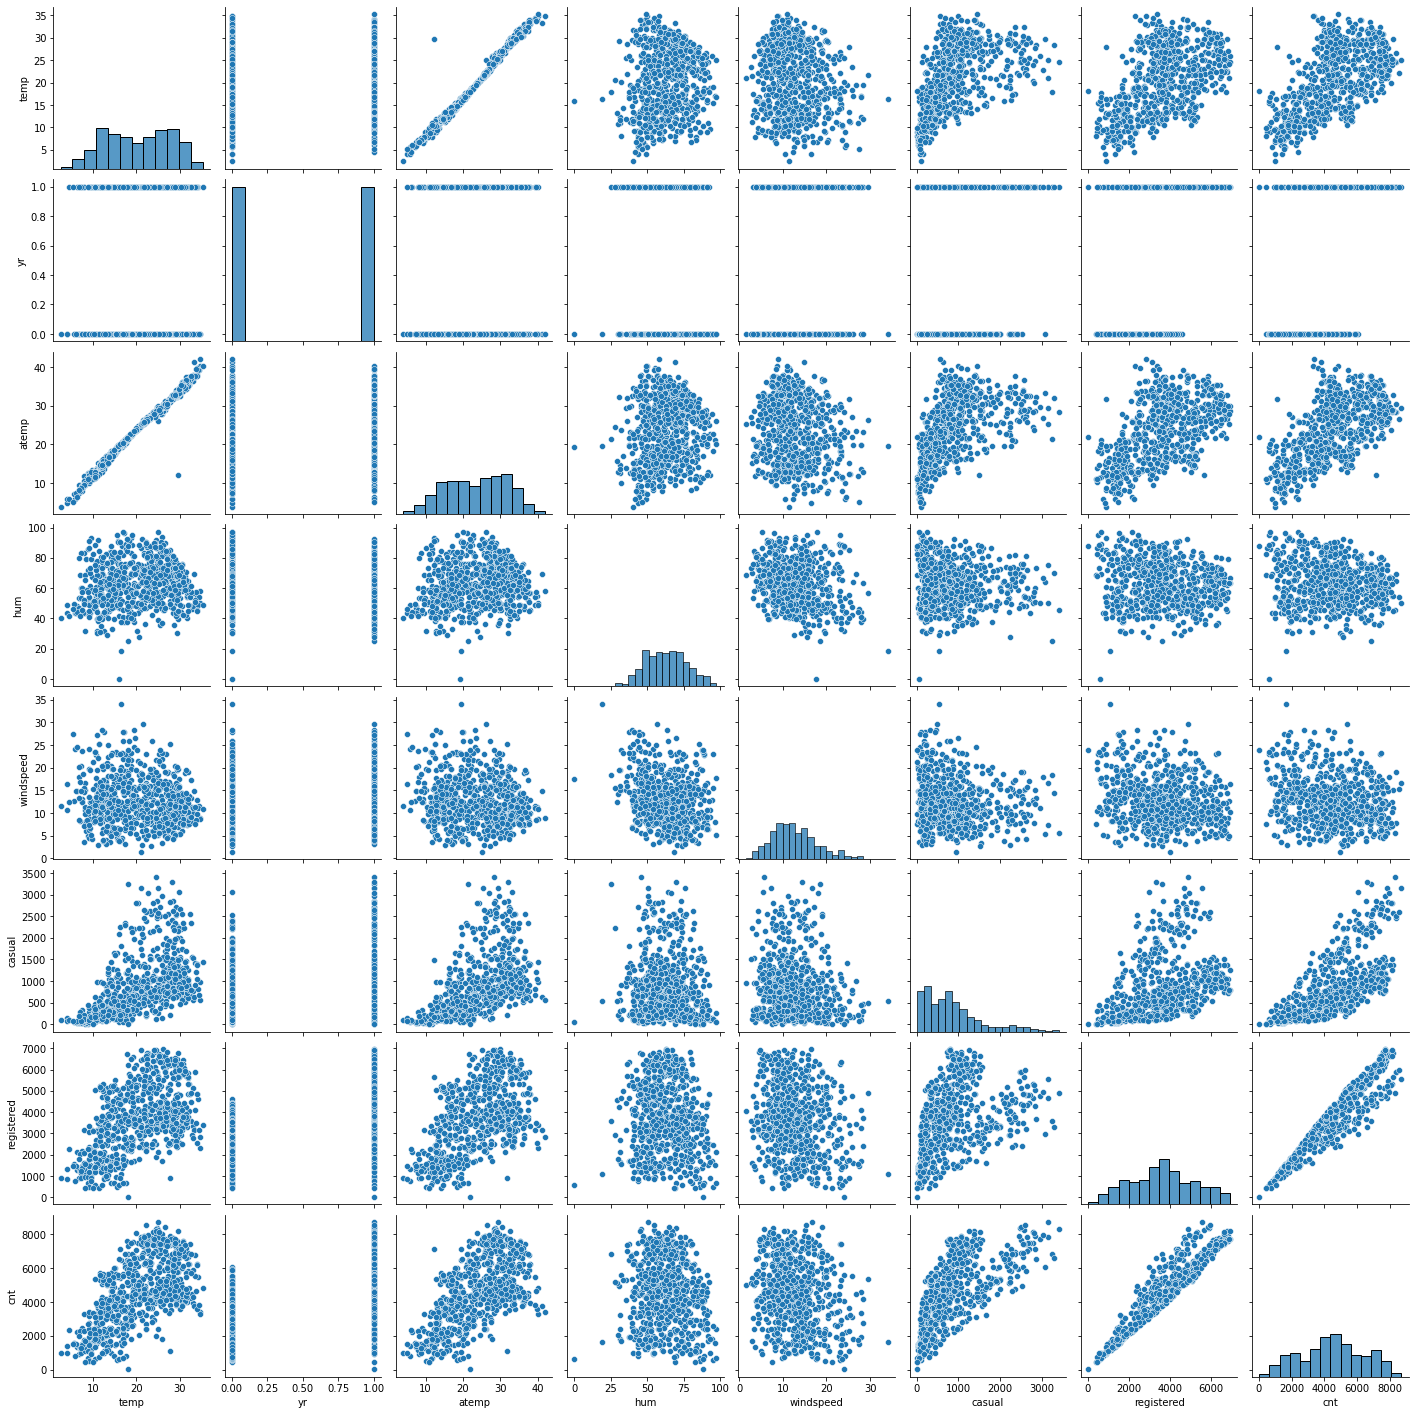

In [30]:
sns.pairplot(bike[["temp","yr","atemp","hum","windspeed","casual","registered","cnt"]])

##Let us have a closer look at the below numeric variables:
"atemp","hum","windspeed","cnt"

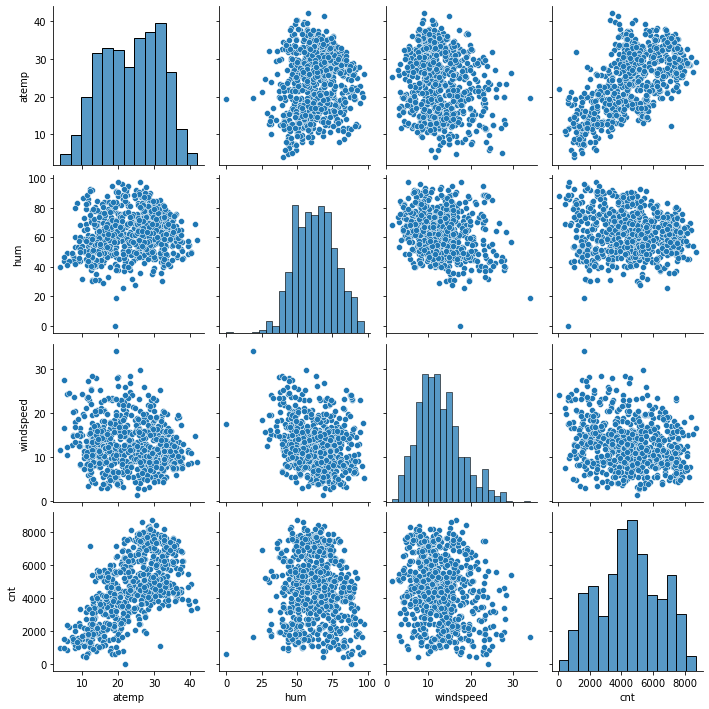

In [31]:
sns.pairplot(bike[["atemp","hum","windspeed","cnt"]])

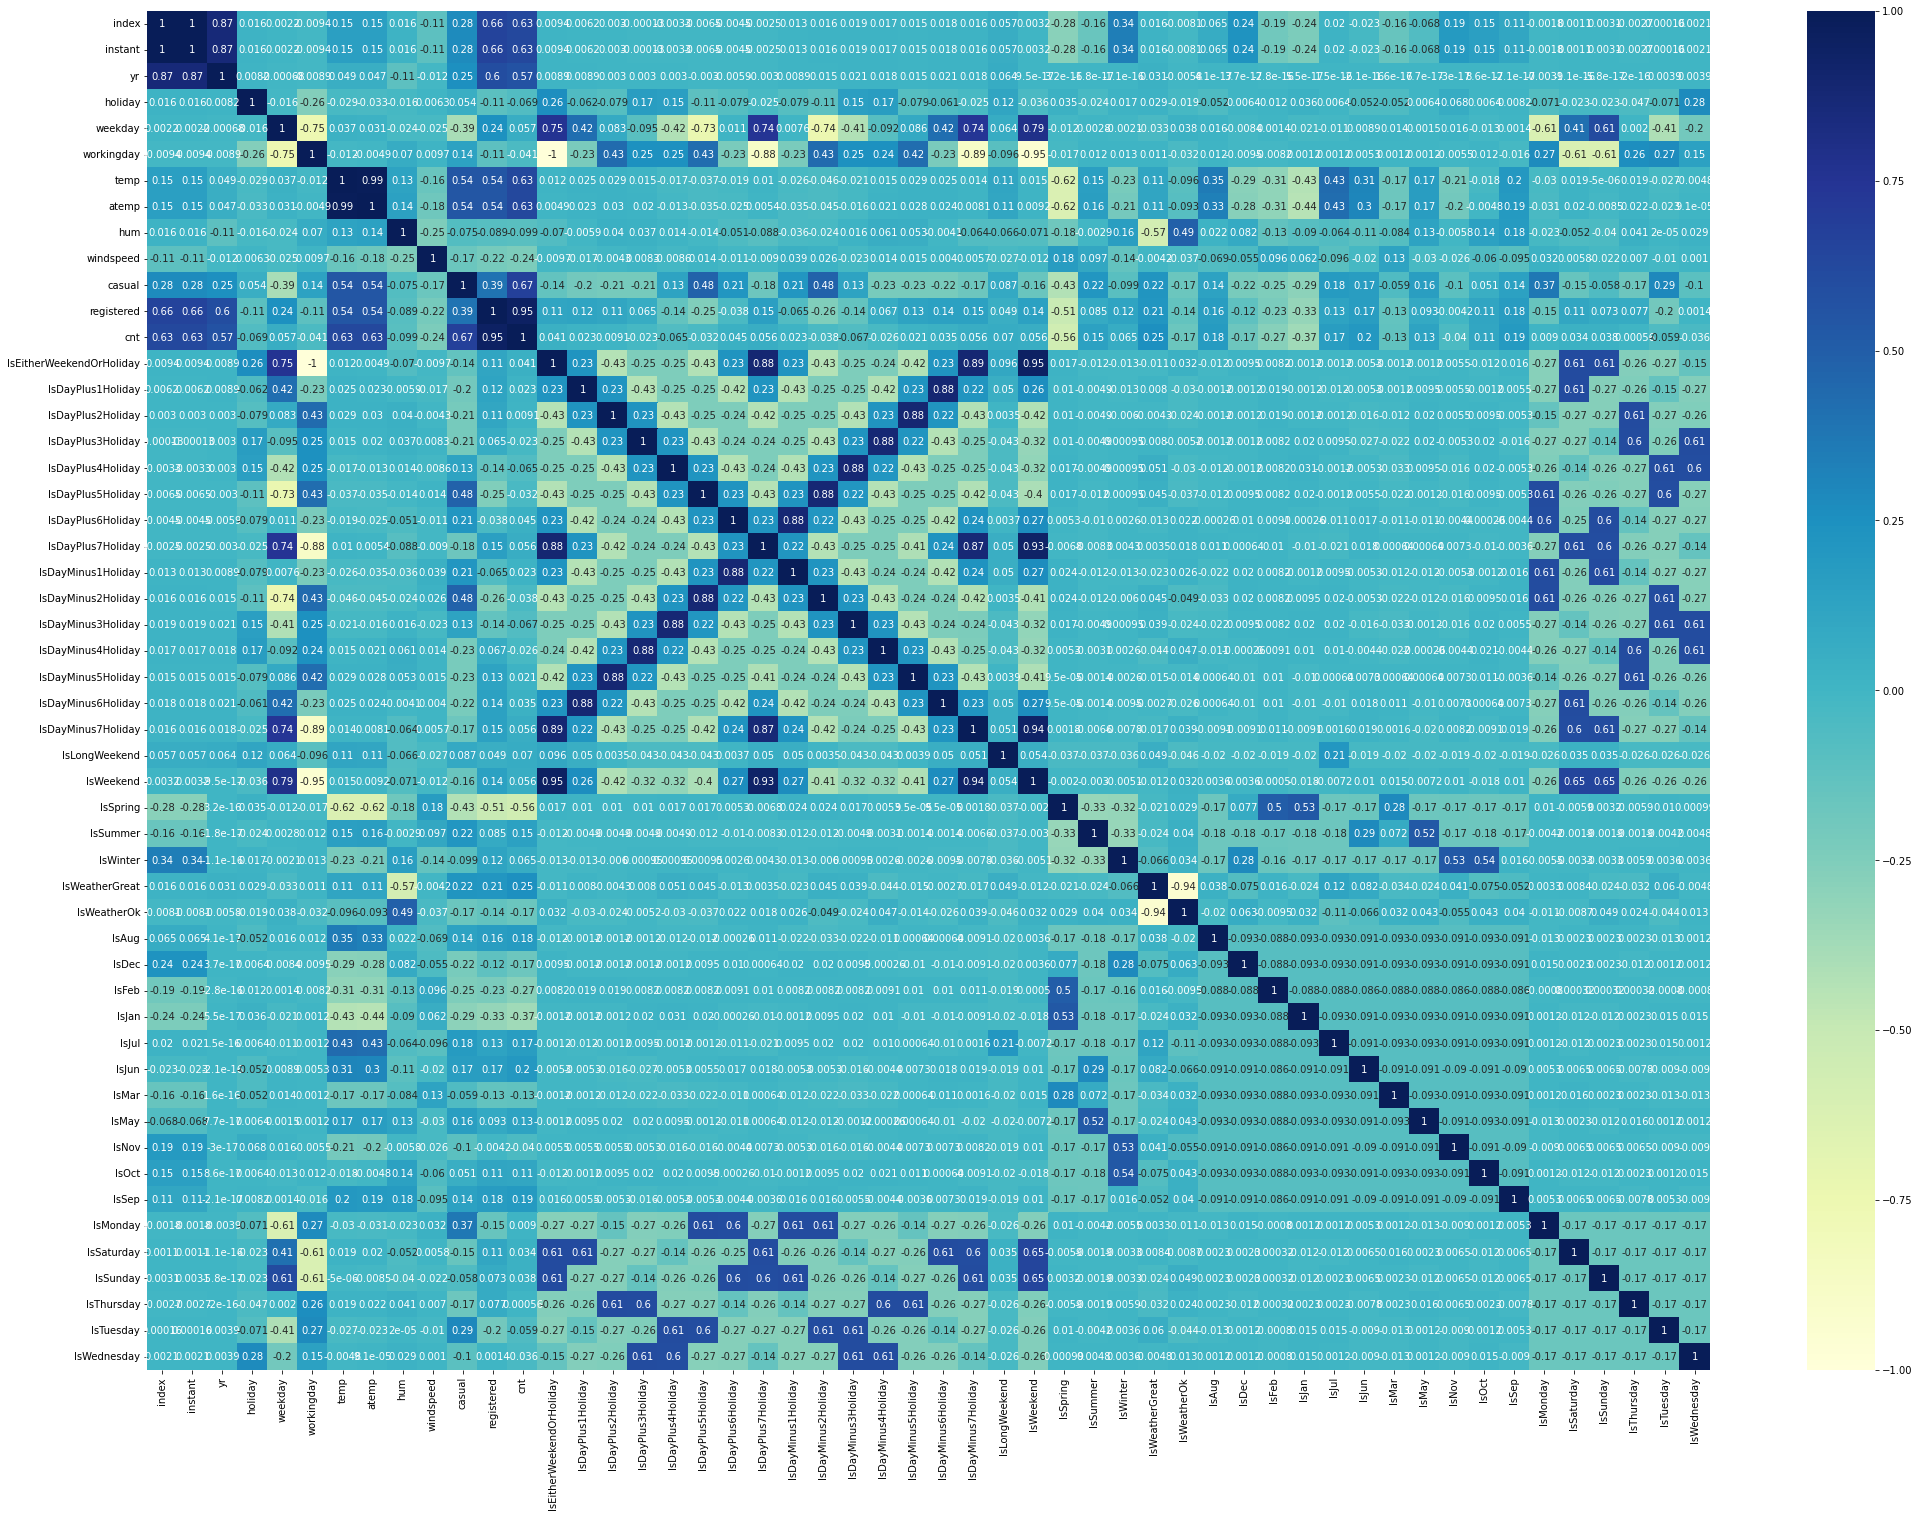

In [32]:
plt.figure(figsize = (35,25))
sns.heatmap(bike.corr(),annot=True,cmap="YlGnBu")

###Observation: 
There is a clear trend between atemp and cnt
We can see some multicollinear variables like certain months with seasons.
But, we are not doing any manual removal of these columns we will use VIF approach to deal with it

In [33]:
bike.columns

Index(['index', 'instant', 'dteday', 'season', 'yr', 'mnth', 'holiday',
       'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'IsEitherWeekendOrHoliday',
       'IsDayPlus1Holiday', 'IsDayPlus2Holiday', 'IsDayPlus3Holiday',
       'IsDayPlus4Holiday', 'IsDayPlus5Holiday', 'IsDayPlus6Holiday',
       'IsDayPlus7Holiday', 'IsDayMinus1Holiday', 'IsDayMinus2Holiday',
       'IsDayMinus3Holiday', 'IsDayMinus4Holiday', 'IsDayMinus5Holiday',
       'IsDayMinus6Holiday', 'IsDayMinus7Holiday', 'IsLongWeekend',
       'IsWeekend', 'weekdayText', 'humidity_range', 'windspeed_range',
       'IsSpring', 'IsSummer', 'IsWinter', 'IsWeatherGreat', 'IsWeatherOk',
       'IsAug', 'IsDec', 'IsFeb', 'IsJan', 'IsJul', 'IsJun', 'IsMar', 'IsMay',
       'IsNov', 'IsOct', 'IsSep', 'IsMonday', 'IsSaturday', 'IsSunday',
       'IsThursday', 'IsTuesday', 'IsWednesday'],
      dtype='object')

##Univariate Analysis between Season and Count

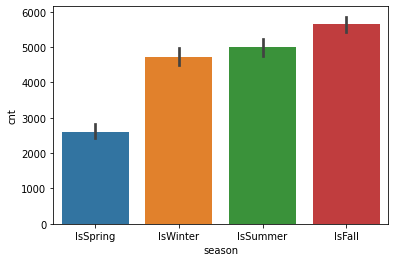

In [34]:
sns.barplot(data = bike, x = "season", y=  "cnt", order=["IsSpring", "IsWinter", "IsSummer", "IsFall"])
#bike["season","cnt"].plot(kind="bar")

###Observation:
Fall has maximum boombike in terms of number users of boombikes
Summer is follows Fall in terms of number users of boombikes
Winter follows Summer in terms of number users of boombikes
Spring shows least usage of boombikes

##Univariate Analysis between Month and Count

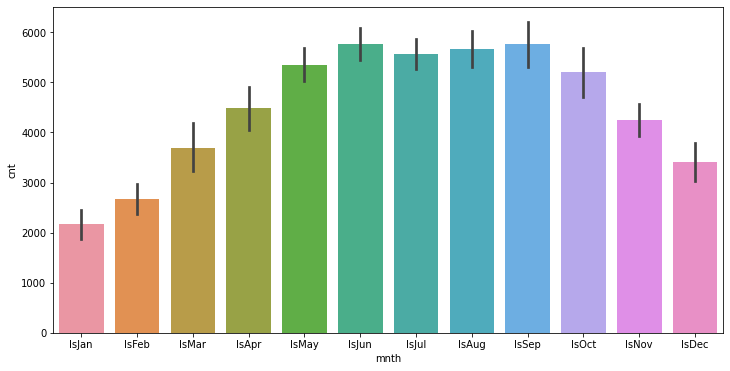

In [35]:
plt.figure(figsize=[12,6])
sns.barplot(data = bike, x = "mnth", y =  "cnt")
plt.show()

In [36]:
bike.mnth

0      IsJan
1      IsJan
2      IsJan
3      IsJan
4      IsJan
       ...  
725    IsDec
726    IsDec
727    IsDec
728    IsDec
729    IsDec
Name: mnth, Length: 730, dtype: object

###Observation:
Maximum boombike usage is seen between the months of May,Jun,Jul,Aug,Sep,Oct

##Univariate Analysis between Weather Situation and Count

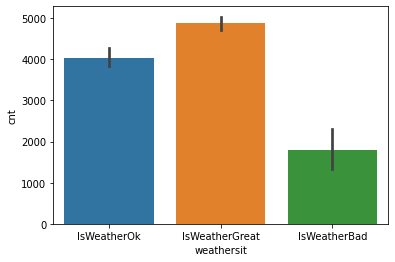

In [37]:
sns.barplot(data = bike, x = "weathersit", y=  "cnt")
#bike["season","cnt"].plot(kind="bar")

###Observation:
Weather plays an important role in boombike usage.
If the Weather is Great people opt for boombikes
If the Weather is bad, people don't opt for boombikes

##Bivariate Analysis between Month,weathersit and Count

weathersit  IsWeatherGreat  IsWeatherOk  IsWeatherBad
mnth                                                 
IsOct             0.516129     0.403226      0.080645
IsNov             0.700000     0.250000      0.050000
IsSep             0.550000     0.400000      0.050000
IsDec             0.516129     0.435484      0.048387
IsApr             0.616667     0.350000      0.033333
IsMar             0.580645     0.387097      0.032258
IsFeb             0.660714     0.321429      0.017857
IsJan             0.596774     0.387097      0.016129
IsJul             0.822581     0.161290      0.016129
IsAug             0.693548     0.306452      0.000000
IsJun             0.766667     0.233333      0.000000
IsMay             0.596774     0.403226      0.000000


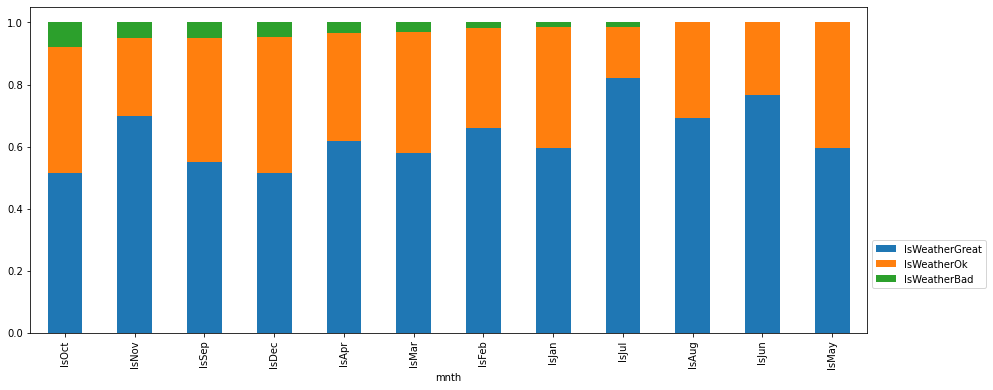

In [38]:
vs = pd.pivot_table(data=bike,values="index",index="mnth",columns="weathersit",aggfunc=len).fillna(0).astype('int')
vs_per = vs[["IsWeatherGreat","IsWeatherOk","IsWeatherBad"]].apply(lambda x: x/x.sum(),axis=1)
vs_per = vs_per.sort_values("IsWeatherBad", ascending = False)
print(vs_per)
vs_per.plot(kind="bar",stacked="True",figsize=[15,6])
#vs.plot(kind="bar",stacked="True",figsize=[15,6])
plt.legend(bbox_to_anchor =(1, 0.3))
plt.show()

###Observation:
Months with better weathers have more boombike usage like May,June,July and August

##Univariate Analysis between Year and Count

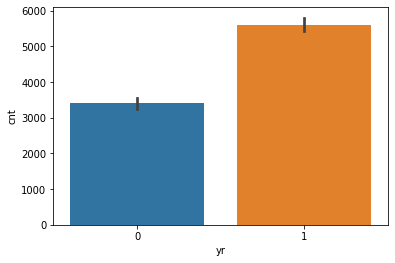

In [39]:
sns.barplot(data = bike, x = "yr", y =  "cnt")
#bike["season","cnt"].plot(kind="bar")

###Observation:
2019 has more boombike users in comparison to 2018.

Good indication that as move to future years without any drastic conditions like Pandemics, Boombikes is likely to grow and have more users 

##Univariate Analysis between Holiday and Count

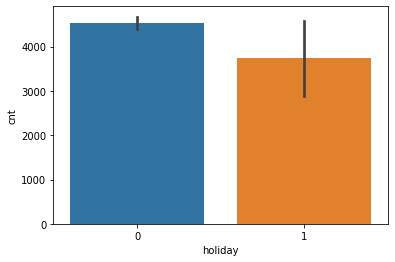

In [40]:
sns.barplot(data = bike, x = "holiday", y =  "cnt")

###Observation:
Holidays shows a negative correlation with count

Probably, the weekday holidays are not resulting in increase in counts

##Univariate Analysis between Weekend and Count

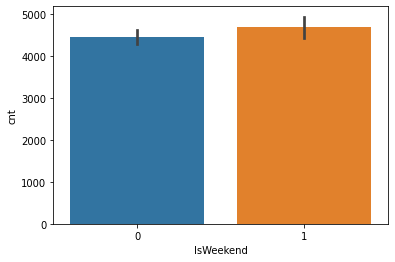

In [41]:
sns.barplot(data = bike, x = "IsWeekend", y =  "cnt")

###Observation:
Weekend shows slight increase in count 

##Univariate Analysis between WorkingDay and Count

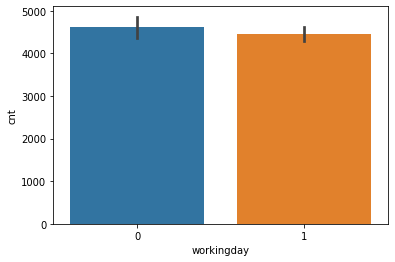

In [42]:
sns.barplot(data = bike, x = "workingday", y =  "cnt")

###Observation:
workingdays shows slightly less count in comparison to non-working days

##Univariate Analysis between WeekdayText and Count

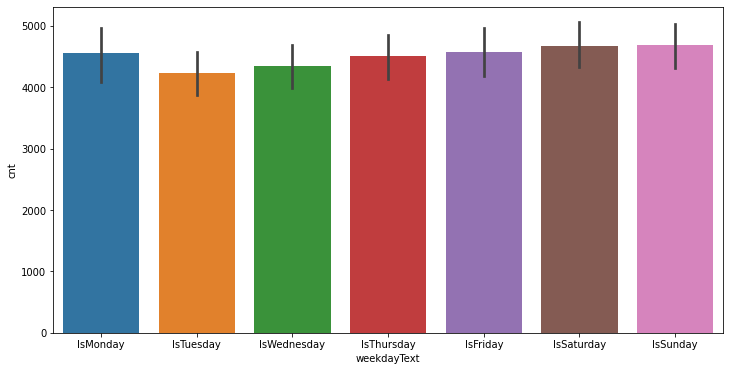

In [43]:
plt.figure(figsize=[12,6])
sns.barplot(data = bike, x = "weekdayText", y =  "cnt", order = ["IsMonday","IsTuesday","IsWednesday","IsThursday","IsFriday","IsSaturday","IsSunday"])

###Observation:
Friday, Saturday, Sunday, Monday shows better count in comparison to Tuesday, Wednesday, Thursday.

In short Friday and Mondays are closer to Saturdays and Sundays, so people might be interested in having boombikes for rent as people tend take leaves on fridays and mondays so that they can have extended weekend

##Univariate Analysis between IsEitherWeekendOrHoliday and Count

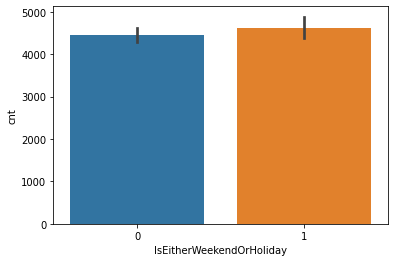

In [44]:
sns.barplot(data = bike, x = "IsEitherWeekendOrHoliday", y =  "cnt")

###Observation:
working days shows slightly lesser count

##Univariate Analysis between LongWeekend and Count

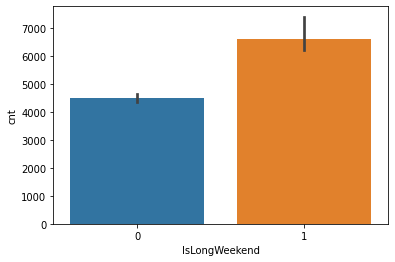

In [45]:
sns.barplot(data = bike, x = "IsLongWeekend", y =  "cnt")

###Observation:
longweekend days have more bike users in comparison to other days

##Univariate Analysis between IsDayPlus[1,2,3,4,5,6,7]Holiday and Count
These derived variables tells us how days just before any holidays impact the count.

The reason being people generally tend take extended leaves along with regular holidays.

Example: People tend to have a complete week off during Thanksgiving or Christmas holidays

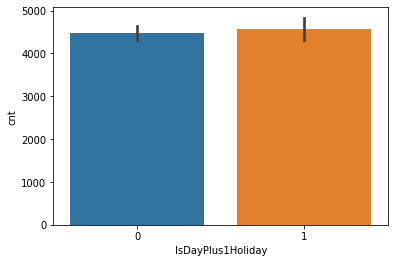

In [46]:
sns.barplot(data = bike, x = "IsDayPlus1Holiday", y =  "cnt")

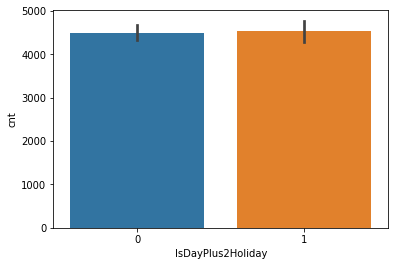

In [47]:
sns.barplot(data = bike, x = "IsDayPlus2Holiday", y =  "cnt")

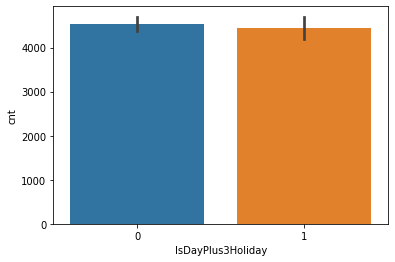

In [48]:
sns.barplot(data = bike, x = "IsDayPlus3Holiday", y =  "cnt")

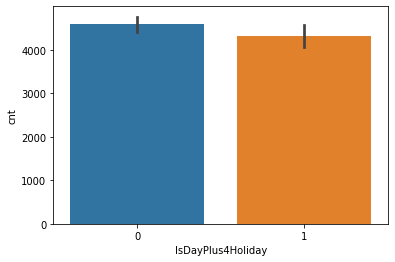

In [49]:
sns.barplot(data = bike, x = "IsDayPlus4Holiday", y =  "cnt")

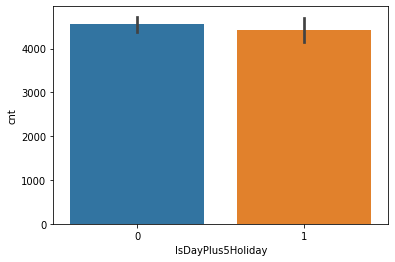

In [50]:
sns.barplot(data = bike, x = "IsDayPlus5Holiday", y =  "cnt")

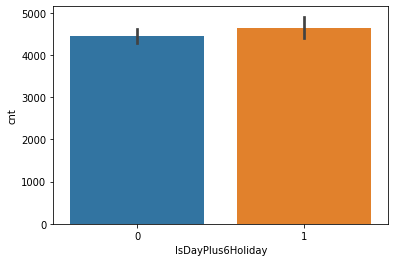

In [51]:
sns.barplot(data = bike, x = "IsDayPlus6Holiday", y =  "cnt")

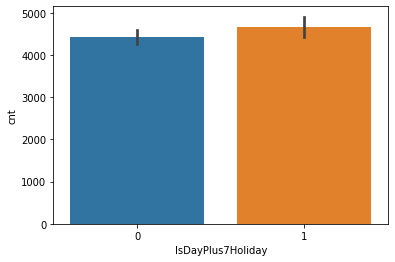

In [52]:
sns.barplot(data = bike, x = "IsDayPlus7Holiday", y =  "cnt")

###Observation:
There isn't any significant trend here

##Univariate Analysis between IsDayMinus[1,2,3,4,5,6,7]Holiday and Count
These derived variables tells us how days just before any holidays impact the count.

The reason being people generally tend take extended leaves along with regular holidays.

Example: People tend to have a complete week off during Thanksgiving or Christmas holidays

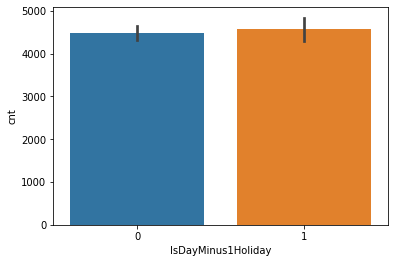

In [53]:
sns.barplot(data = bike, x = "IsDayMinus1Holiday", y =  "cnt")

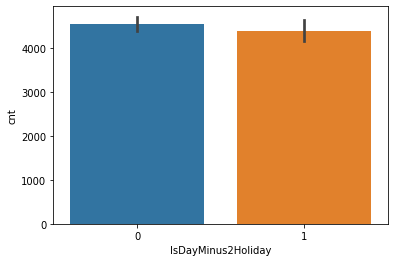

In [54]:
sns.barplot(data = bike, x = "IsDayMinus2Holiday", y =  "cnt")

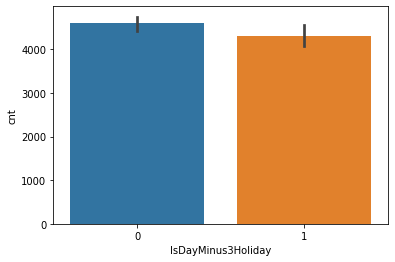

In [55]:
sns.barplot(data = bike, x = "IsDayMinus3Holiday", y =  "cnt")

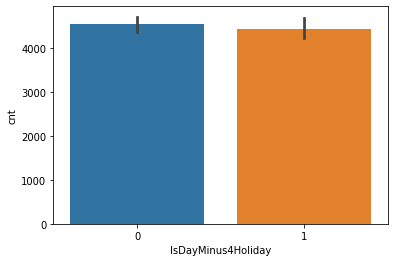

In [56]:
sns.barplot(data = bike, x = "IsDayMinus4Holiday", y =  "cnt")

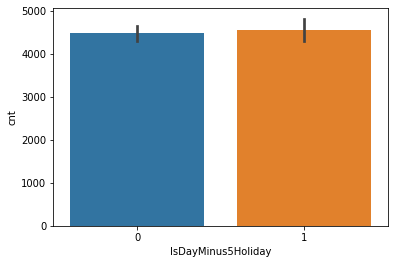

In [57]:
sns.barplot(data = bike, x = "IsDayMinus5Holiday", y =  "cnt")

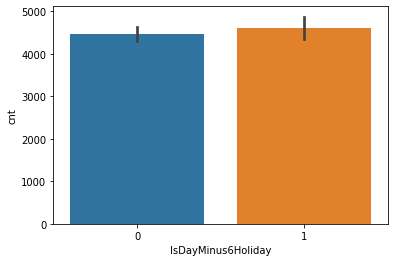

In [58]:
sns.barplot(data = bike, x = "IsDayMinus6Holiday", y =  "cnt")

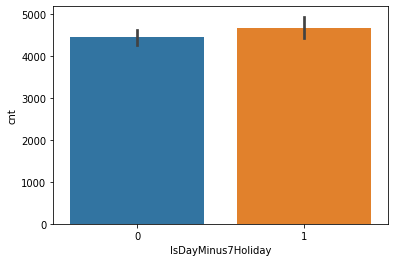

In [59]:
sns.barplot(data = bike, x = "IsDayMinus7Holiday", y =  "cnt")

###Observation:
There isn't any significant trend here

##Univariate Analysis between humidity_range and Count

In [60]:
bike["humidity_range"].value_counts()

hum7[50.0-60.0]      179
hum8[60.0-70.0]      174
hum9[70.0-80.0]      151
hum6[40.0-50.0]      102
hum10[80.0-90.0]      78
hum11[90.0-100.0]     23
hum5[30.0-40.0]       18
hum4[20.0-30.0]        3
hum3[10.0-20.0]        1
hum2[0.0-10.0]         1
Name: humidity_range, dtype: int64

###Observation:
**Outlier Detected**

Humidity ranges between 0 to 40 and 90 to 100 has very less records in comparison to other ranges
hum11[90.0-100.0]     
hum5[30.0-40.0]       
hum4[20.0-30.0]        
hum3[10.0-20.0]        
hum2[0.0-10.0]         

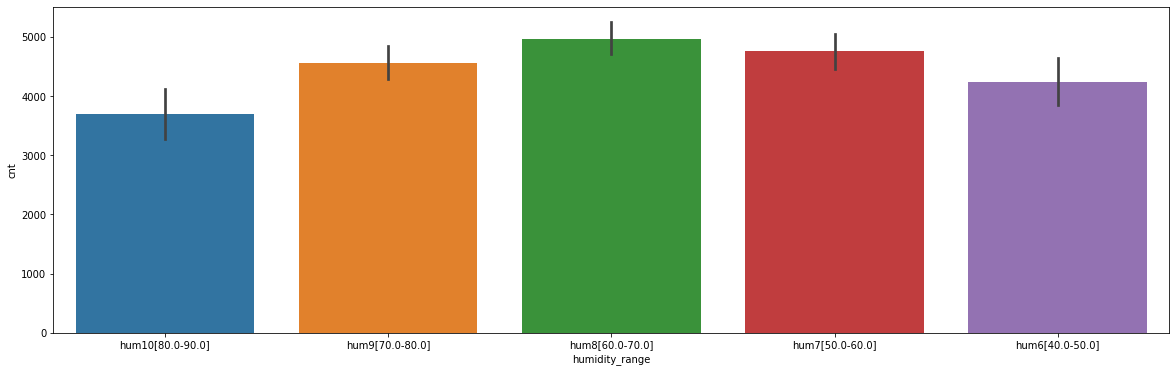

In [61]:
plt.figure(figsize=[20,6])
sns.barplot(data = bike[ (bike["hum"] >= 40) & (bike["hum"] <= 89) ], x = "humidity_range", y =  "cnt", estimator=mean, order = ['hum10[80.0-90.0]', 'hum9[70.0-80.0]', 
       'hum8[60.0-70.0]', 'hum7[50.0-60.0]', 'hum6[40.0-50.0]',])

###Observation:
No specific trend other than humidity between 50 to 80 is idle

##Univariate Analysis between windspeed and Count

In [62]:
bike["windspeed_range"].value_counts()

ws3[10.0-20.0]    458
ws2[0.0-10.0]     179
ws4[20.0-30.0]     91
ws5[30.0-40.0]      2
Name: windspeed_range, dtype: int64

###Observation:
**Outlier Detected**
lesser number of records detected for Windspeed ranges between **30 to 40** in comparison to other ranges
    
ws5[30.0-40.0]      

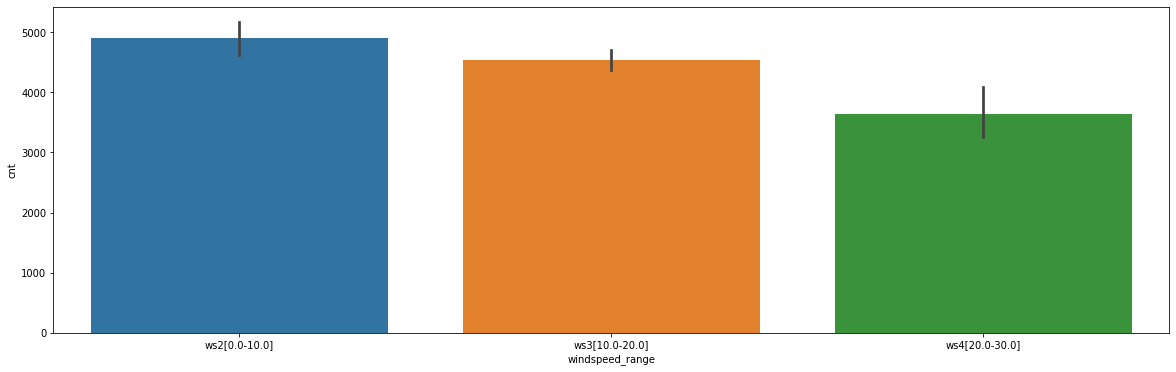

In [63]:
plt.figure(figsize=[20,6])
sns.barplot(data = bike[bike["windspeed_range"] != 'ws5[30.0-40.0]' ], x = "windspeed_range", y =  "cnt", estimator=mean, order = ['ws2[0.0-10.0]','ws3[10.0-20.0]','ws4[20.0-30.0]'])

###Observation:
lower the windspeed higher the usage of boombikes
higher the windspeed lower the usage of boombikes

###Observation:
No specific trend other than humidity between 50 to 80 is idle

# **Key Variables:**


1.   Season
2.   Month
3.   Weather Situation
4.   Year (age of Boombike)
5.   Weekend
6.   IsLongWeekend
7.   Windspeed
8.   atemp
9.   yr (age of the company)
10.  Holiday

Note: these are the key variables, in some cases we will use their corresponding dummy variables

We will further see the impact of these variables along with others whilebuilding the models



# Drop columns which are not required for linear regression model building

In [64]:
bike.columns

Index(['index', 'instant', 'dteday', 'season', 'yr', 'mnth', 'holiday',
       'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'IsEitherWeekendOrHoliday',
       'IsDayPlus1Holiday', 'IsDayPlus2Holiday', 'IsDayPlus3Holiday',
       'IsDayPlus4Holiday', 'IsDayPlus5Holiday', 'IsDayPlus6Holiday',
       'IsDayPlus7Holiday', 'IsDayMinus1Holiday', 'IsDayMinus2Holiday',
       'IsDayMinus3Holiday', 'IsDayMinus4Holiday', 'IsDayMinus5Holiday',
       'IsDayMinus6Holiday', 'IsDayMinus7Holiday', 'IsLongWeekend',
       'IsWeekend', 'weekdayText', 'humidity_range', 'windspeed_range',
       'IsSpring', 'IsSummer', 'IsWinter', 'IsWeatherGreat', 'IsWeatherOk',
       'IsAug', 'IsDec', 'IsFeb', 'IsJan', 'IsJul', 'IsJun', 'IsMar', 'IsMay',
       'IsNov', 'IsOct', 'IsSep', 'IsMonday', 'IsSaturday', 'IsSunday',
       'IsThursday', 'IsTuesday', 'IsWednesday'],
      dtype='object')

In [65]:
bike = bike.drop(columns = ['index', 'instant', 'dteday', 'season', 'mnth',
       'weekday',  'weathersit', 'temp', 'casual', 'registered', 'IsEitherWeekendOrHoliday',
       'IsDayPlus1Holiday', 'IsDayPlus2Holiday', 'IsDayPlus3Holiday',
       'IsDayPlus4Holiday', 'IsDayPlus5Holiday', 'IsDayPlus6Holiday',
       'IsDayPlus7Holiday', 'IsDayMinus1Holiday', 'IsDayMinus2Holiday',
       'IsDayMinus3Holiday', 'IsDayMinus4Holiday', 'IsDayMinus5Holiday',
       'IsDayMinus6Holiday', 'IsDayMinus7Holiday', 'humidity_range', 'windspeed_range'])

#Test Train Split

In [66]:
bike_train, bike_test = train_test_split(bike, train_size = 0.75, random_state = 100)
print(bike_train.head())
print(bike_test.head())

     yr  holiday  workingday     atemp      hum  windspeed   cnt  \
311   0        0           1  20.61230  72.1667   4.625513  4205   
523   1        0           0  29.89310  46.7917  11.750661  7736   
381   1        0           1  18.21390  71.6087  23.391710  2935   
413   1        0           1  17.77125  53.4583  12.792243  4318   
253   0        0           1  30.46145  71.3750   7.708618  5046   

     IsLongWeekend  IsWeekend weekdayText  ...  IsMay  IsNov  IsOct  IsSep  \
311              0          0  IsThursday  ...      0      1      0      0   
523              0          1    IsSunday  ...      0      0      0      0   
381              0          0  IsThursday  ...      0      0      0      0   
413              0          0    IsMonday  ...      0      0      0      0   
253              0          0   IsTuesday  ...      0      0      0      1   

     IsMonday  IsSaturday  IsSunday  IsThursday  IsTuesday  IsWednesday  
311         0           0         0           1 

#Rescaling

**What is scaling:**
Here, Scaling refers to Feature Scaling. It is process of putting the Feature values within the same range.
**Why is scaling performed:**
For faster and smoother gradient descent. With different features having different scales or range of values, the algorithm will follow different step sizes. This not only makes the process (like gradient descent) unsmooth but also increases the execution time. Therefore, to ensure that gradient descent converges more smoothly and quickly, we need to scale our features so that they share a similar scale.
**which method for scaling:**
MinMaxScaler


In [67]:
scaler = MinMaxScaler()
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,IsLongWeekend,IsWeekend,weekdayText,...,IsMay,IsNov,IsOct,IsSep,IsMonday,IsSaturday,IsSunday,IsThursday,IsTuesday,IsWednesday
311,0,0,1,0.437339,0.743667,0.057471,0.481247,0,0,IsThursday,...,0,1,0,0,0,0,0,1,0,0
523,1,0,0,0.680985,0.482181,0.286093,0.887483,0,1,IsSunday,...,0,0,0,0,0,0,1,0,0,0
381,1,0,1,0.374375,0.737917,0.659615,0.335136,0,0,IsThursday,...,0,0,0,0,0,0,0,1,0,0
413,1,0,1,0.362754,0.550880,0.319514,0.494248,0,0,IsMonday,...,0,0,0,0,1,0,0,0,0,0
253,0,0,1,0.695906,0.735509,0.156398,0.578003,0,0,IsTuesday,...,0,0,0,1,0,0,0,0,1,0


#Correlation between the numeric values

In [68]:
bike_train.corr()
#sns.heatmap(bike_train.corr()[(bike_train.corr() > 0.7) or (bike_train.corr() < -0.7)],annot=True,cmap="YlGnBu")

,yr,holiday,workingday,atemp,hum,windspeed,cnt,IsLongWeekend,IsWeekend,IsSpring,...,IsMay,IsNov,IsOct,IsSep,IsMonday,IsSaturday,IsSunday,IsThursday,IsTuesday,IsWednesday
yr,1.000000,0.008433,0.002045,0.085104,-0.081833,0.002390,0.573177,0.042098,-0.009651,-0.022238,...,-0.044515,-0.024890,-0.005104,0.008579,-0.022249,0.004410,-0.017283,0.014874,-0.022249,0.033562
holiday,0.008433,1.000000,-0.270686,-0.089767,-0.038456,0.033720,-0.118934,-0.007186,-0.021525,0.080193,...,-0.050880,0.112688,-0.012513,0.032657,-0.071018,0.000847,-0.029338,-0.033687,-0.071018,0.270024
workingday,0.002045,-0.270686,1.000000,0.001162,0.047443,0.006714,-0.018103,-0.068989,-0.945461,-0.035632,...,0.026211,0.007494,0.048151,-0.041615,0.262363,-0.627619,-0.607384,0.233430,0.262363,0.139707
atemp,0.085104,-0.089767,0.001162,1.000000,0.175757,-0.205787,0.651477,0.075362,0.022621,-0.627601,...,0.171206,-0.177533,0.008046,0.212369,-0.042267,0.019482,0.009955,0.046669,-0.018731,-0.044520
hum,-0.081833,-0.038456,0.047443,0.175757,1.000000,-0.260246,-0.047979,-0.055160,-0.043830,-0.204553,...,0.145250,0.008391,0.161592,0.157870,-0.036725,-0.034701,-0.022413,0.027654,0.000313,0.017490
windspeed,0.002390,0.033720,0.006714,-0.205787,-0.260246,1.000000,-0.247968,-0.024320,-0.021517,0.172898,...,-0.042328,0.001720,-0.025924,-0.115062,0.055756,-0.010876,-0.017315,-0.006656,-0.022370,0.022295
cnt,0.573177,-0.118934,-0.018103,0.651477,-0.047979,-0.247968,1.000000,0.038111,0.049986,-0.567066,...,0.105387,-0.043744,0.092069,0.207293,-0.009970,0.032370,0.032944,0.035236,-0.078953,-0.041669
IsLongWeekend,0.042098,-0.007186,-0.068989,0.075362,-0.055160,-0.024320,0.038111,1.000000,0.072969,-0.025220,...,-0.012968,-0.012813,-0.013273,-0.012657,-0.018100,-0.016662,0.113584,-0.016927,-0.018100,-0.018229
IsWeekend,-0.009651,-0.021525,-0.945461,0.022621,-0.043830,-0.021517,0.049986,0.072969,1.000000,-0.000840,...,-0.011673,-0.007888,-0.048643,0.026780,-0.248054,0.663824,0.642421,-0.231981,-0.248054,-0.249814
IsSpring,-0.022238,0.080193,-0.035632,-0.627601,-0.204553,0.172898,-0.567066,-0.025220,-0.000840,1.000000,...,-0.178569,-0.176442,-0.182775,-0.174297,0.018699,-0.006916,0.005975,-0.037576,0.018699,0.015619


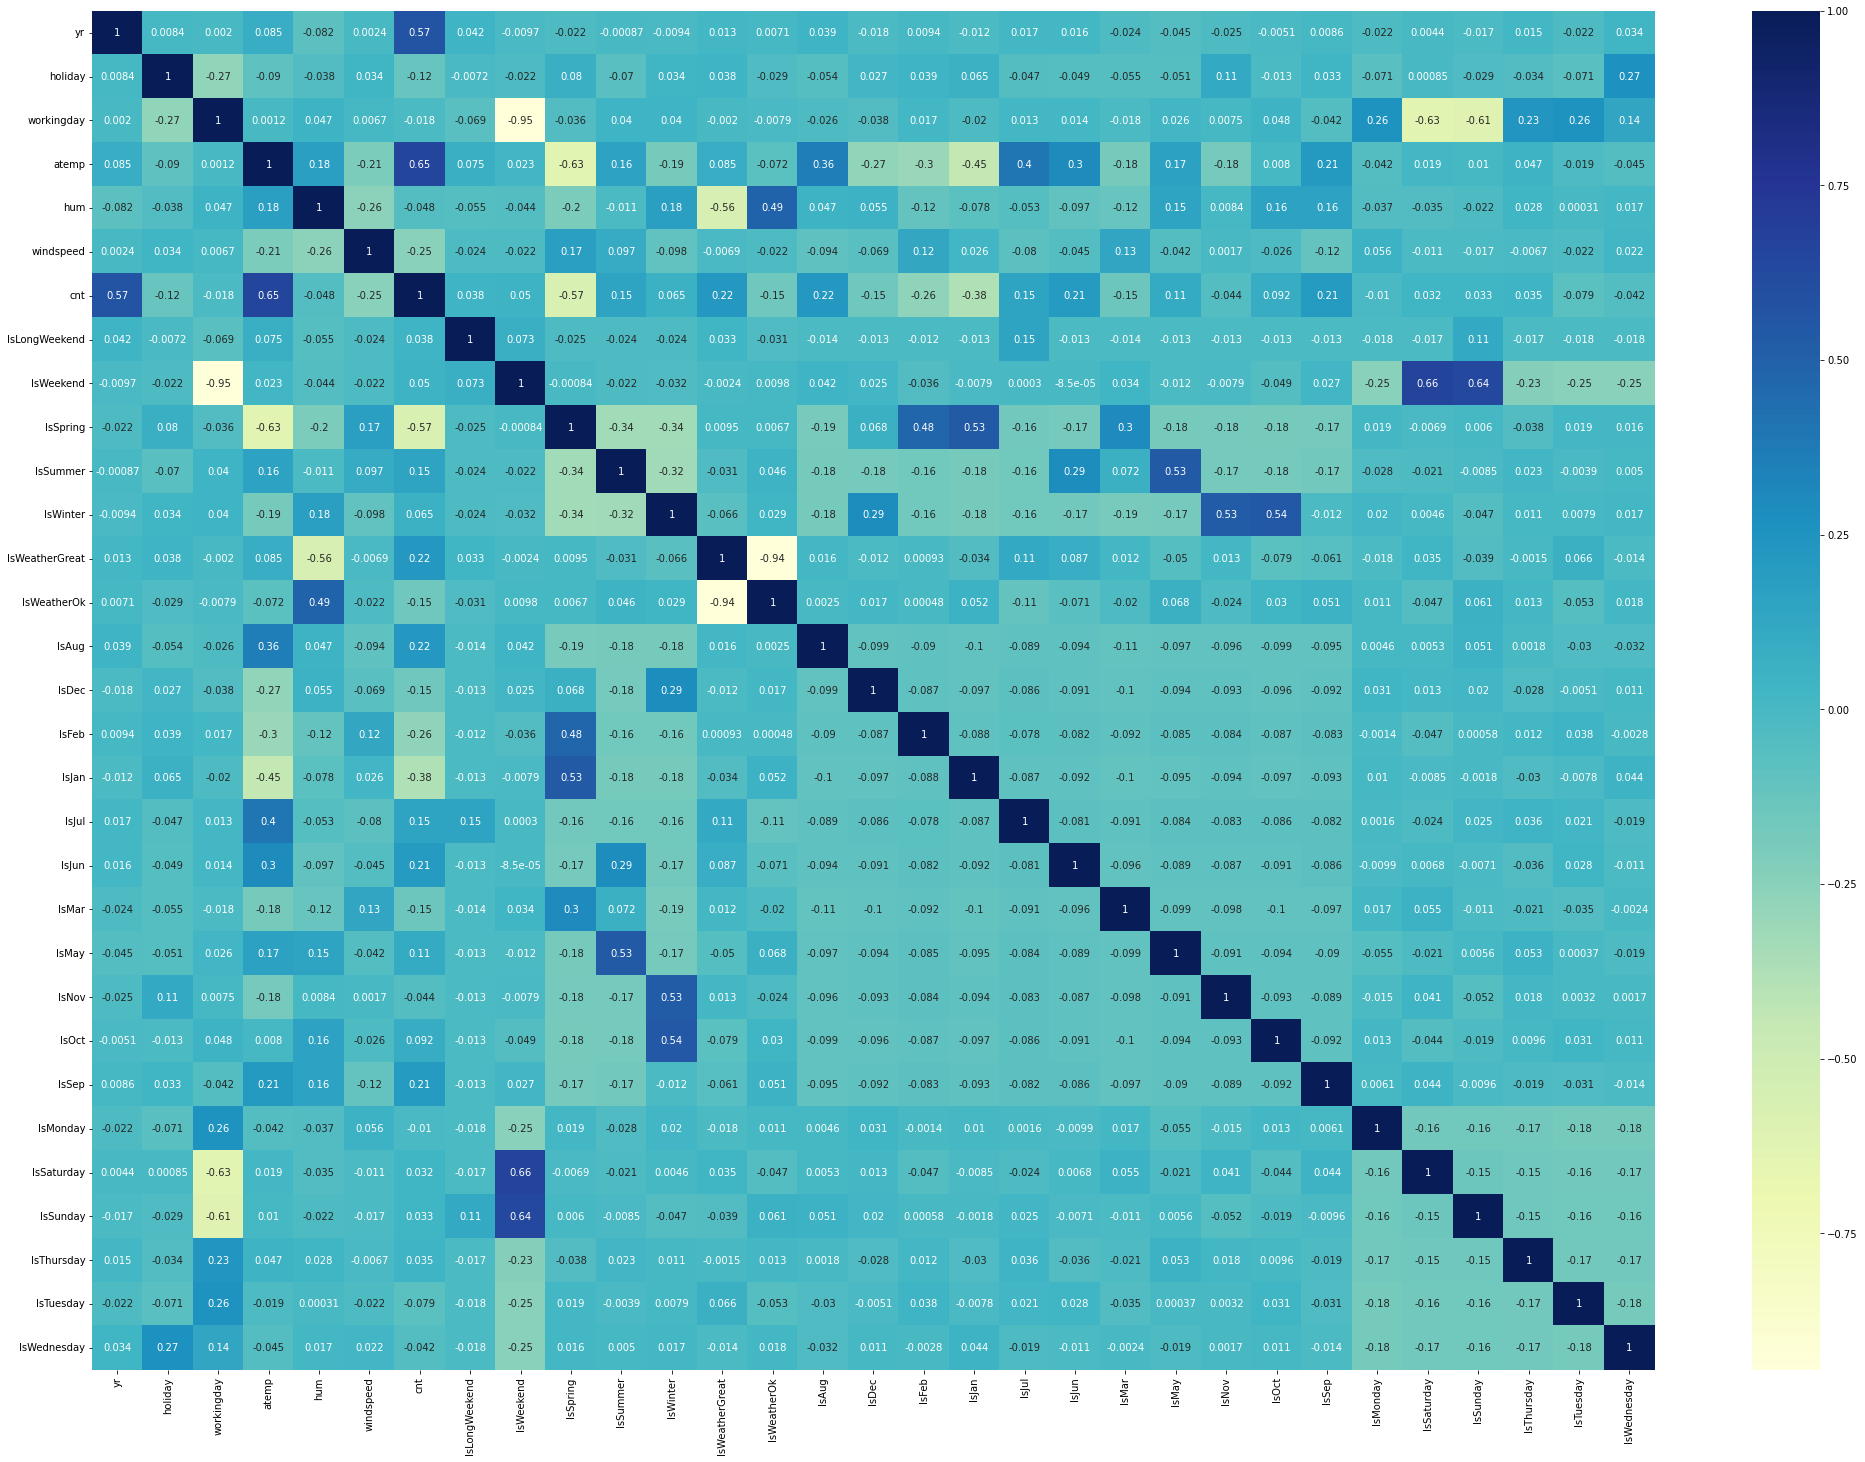

In [69]:
plt.figure(figsize = (35,25))
sns.heatmap(bike_train.corr(),annot=True,cmap="YlGnBu")

###Observation:
- atemp seems to be higly correlated with count
- IsSaturday & IsSunday are multicollinear with IsLongWeekend
- Months seems to be collinear with season

**not removed multicollinearity as of now, will use VIF later to remove it**


#Y Train and X Train
Seggregate the train data into X(Independent Variables) and Y(Target Variable)

In [70]:
y_train = bike_train.pop('cnt')
X_train = bike_train

#We will follow two approach for model building and predicting


1.   Manual Approach
2.   Using RFE



#1. Train and Build Models (**Manual Approach**)

##**Model#1**
Using key variable:
['yr', 'holiday', 'atemp', 'hum','windspeed', 'IsLongWeekend', 'IsSummer', 'IsWinter', 'IsWeatherGreat','IsWeatherOk', 'IsAug', 'IsDec', 'IsFeb', 'IsJan', 'IsJul', 'IsJun','IsMar', 'IsMay', 'IsNov', 'IsOct', 'IsSep']

In [71]:
keyVariables = ['yr', 'holiday', 'atemp', 'hum','windspeed', 'IsLongWeekend', 'IsSummer', 'IsWinter', 'IsWeatherGreat','IsWeatherOk', 'IsAug', 'IsDec', 'IsFeb', 'IsJan', 'IsJul', 'IsJun','IsMar', 'IsMay', 'IsNov', 'IsOct', 'IsSep']
X_train_sm = sm.add_constant(X_train[keyVariables])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
#lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     137.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.02e-197
Time:                        06:32:32   Log-Likelihood:                 552.01
No. Observations:                 547   AIC:                            -1060.
Df Residuals:                     525   BIC:                            -965.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0564      0.050      1.133      0.258      -0.041       0.154
yr                 0.2321      0.008     29.509      0.000       0.217       0.248
holiday           -0.0984      0.024     -4.074      0.000      -0.146      -0.051
atemp              0.4415      0.044     10.111      0.000       0.356       0.527
hum               -0.1622      0.038     -4.246      0.000      -0.237      -0.087
windspeed         -0.1648      0.025     -6.556      0.000      -0.214      -0.115
IsLongWeekend     -0.1147      0.092     -1.253      0.211      -0.294       0.065
IsSummer           0.0707      0.020      3.593      0.000       0.032       0.109
IsWinter           0.1440      0.021      6.840      0.000       0.103       0.185
IsWeatherGreat     0.2432      0.026      9.179      0.000       0.191       0.295
IsWeatherOk        0.1878      0.025      7.486      0.000       0.139       0.237
IsAug              0.0756      0.029      2.607      0.009       0.019       0.133
IsDec             -0.0614      0.032     -1.899      0.058      -0.125       0.002
IsFeb             -0.0568      0.030     -1.897      0.058      -0.116       0.002
IsJan             -0.0824      0.031     -2.665      0.008      -0.143      -0.022
IsJul              0.0163      0.031      0.529      0.597      -0.044       0.077
IsJun              0.0369      0.023      1.606      0.109      -0.008       0.082
IsMar             -0.0082      0.023     -0.350      0.727      -0.054       0.038
IsMay              0.0305      0.021      1.482      0.139      -0.010       0.071
IsNov             -0.0480      0.036     -1.348      0.178      -0.118       0.022
IsOct              0.0076      0.035      0.217      0.828      -0.061       0.076
IsSep              0.1216      0.029      4.176      0.000       0.064       0.179
==============================================================================
Omnibus:                       82.508   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.815
Skew:                          -0.728   Prob(JB):                     2.29e-52
Kurtosis:                       5.884   Cond. No.                         39.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###Observation and Action
Drop IsOct as the P value is high (> 0.05)

##**Model#2 (Drop IsOct)**
Using key variable:
['yr', 'holiday', 'atemp', 'hum','windspeed', 'IsLongWeekend', 'IsSummer', 'IsWinter', 'IsWeatherGreat','IsWeatherOk', 'IsAug', 'IsDec', 'IsFeb', 'IsJan', 'IsJul', 'IsJun','IsMar', 'IsMay', 'IsNov', 'IsOct', 'IsSep']

In [72]:
keyVariables = ['yr', 'holiday', 'atemp', 'hum','windspeed', 'IsLongWeekend', 'IsSummer', 'IsWinter', 'IsWeatherGreat','IsWeatherOk', 'IsAug', 'IsDec', 'IsFeb', 'IsJan', 'IsJul', 'IsJun','IsMar', 'IsMay', 'IsNov', 'IsSep']
X_train_sm = sm.add_constant(X_train[keyVariables])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
#lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     144.5
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          8.59e-199
Time:                        06:32:32   Log-Likelihood:                 551.98
No. Observations:                 547   AIC:                            -1062.
Df Residuals:                     526   BIC:                            -971.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0600      0.047      1.279      0.202      -0.032       0.152
yr                 0.2321      0.008     29.539      0.000       0.217       0.248
holiday           -0.0980      0.024     -4.073      0.000      -0.145      -0.051
atemp              0.4411      0.044     10.122      0.000       0.355       0.527
hum               -0.1612      0.038     -4.252      0.000      -0.236      -0.087
windspeed         -0.1649      0.025     -6.567      0.000      -0.214      -0.116
IsLongWeekend     -0.1145      0.091     -1.252      0.211      -0.294       0.065
IsSummer           0.0682      0.016      4.228      0.000       0.037       0.100
IsWinter           0.1467      0.017      8.663      0.000       0.113       0.180
IsWeatherGreat     0.2431      0.026      9.185      0.000       0.191       0.295
IsWeatherOk        0.1876      0.025      7.490      0.000       0.138       0.237
IsAug              0.0720      0.024      3.037      0.003       0.025       0.119
IsDec             -0.0670      0.019     -3.442      0.001      -0.105      -0.029
IsFeb             -0.0606      0.024     -2.493      0.013      -0.108      -0.013
IsJan             -0.0862      0.025     -3.410      0.001      -0.136      -0.037
IsJul              0.0127      0.026      0.488      0.626      -0.039       0.064
IsJun              0.0350      0.021      1.652      0.099      -0.007       0.077
IsMar             -0.0111      0.019     -0.578      0.564      -0.049       0.027
IsMay              0.0292      0.020      1.483      0.139      -0.009       0.068
IsNov             -0.0546      0.019     -2.867      0.004      -0.092      -0.017
IsSep              0.1173      0.021      5.560      0.000       0.076       0.159
==============================================================================
Omnibus:                       81.740   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.792
Skew:                          -0.722   Prob(JB):                     1.04e-51
Kurtosis:                       5.867   Cond. No.                         39.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###Observation and Action:
Drop IsJul as the P value is high (> 0.05)

##**Model#3 (Drop IsJul)**
Using key variable:
['yr', 'holiday', 'atemp', 'hum','windspeed', 'IsLongWeekend', 'IsSummer', 'IsWinter', 'IsWeatherGreat','IsWeatherOk', 'IsAug', 'IsDec', 'IsFeb', 'IsJan', 'IsJun','IsMar', 'IsMay', 'IsNov', 'IsSep']

In [73]:
keyVariables = ['yr', 'holiday', 'atemp', 'hum','windspeed', 'IsLongWeekend', 'IsSummer', 'IsWinter', 'IsWeatherGreat','IsWeatherOk', 'IsAug', 'IsDec', 'IsFeb', 'IsJan', 'IsJun','IsMar', 'IsMay', 'IsNov', 'IsSep']
X_train_sm = sm.add_constant(X_train[keyVariables])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
#lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     152.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          7.73e-200
Time:                        06:32:32   Log-Likelihood:                 551.86
No. Observations:                 547   AIC:                            -1064.
Df Residuals:                     527   BIC:                            -977.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0627      0.047      1.347      0.179      -0.029       0.154
yr                 0.2319      0.008     29.584      0.000       0.216       0.247
holiday           -0.0989      0.024     -4.126      0.000      -0.146      -0.052
atemp              0.4513      0.038     11.833      0.000       0.376       0.526
hum               -0.1633      0.038     -4.338      0.000      -0.237      -0.089
windspeed         -0.1661      0.025     -6.654      0.000      -0.215      -0.117
IsLongWeekend     -0.1115      0.091     -1.223      0.222      -0.291       0.068
IsSummer           0.0649      0.015      4.451      0.000       0.036       0.093
IsWinter           0.1426      0.015      9.704      0.000       0.114       0.171
IsWeatherGreat     0.2425      0.026      9.179      0.000       0.191       0.294
IsWeatherOk        0.1873      0.025      7.486      0.000       0.138       0.236
IsAug              0.0640      0.017      3.750      0.000       0.030       0.098
IsDec             -0.0681      0.019     -3.521      0.000      -0.106      -0.030
IsFeb             -0.0638      0.023     -2.737      0.006      -0.110      -0.018
IsJan             -0.0888      0.025     -3.588      0.000      -0.137      -0.040
IsJun              0.0293      0.018      1.654      0.099      -0.006       0.064
IsMar             -0.0144      0.018     -0.805      0.421      -0.050       0.021
IsMay              0.0258      0.018      1.402      0.161      -0.010       0.062
IsNov             -0.0547      0.019     -2.878      0.004      -0.092      -0.017
IsSep              0.1111      0.017      6.580      0.000       0.078       0.144
==============================================================================
Omnibus:                       80.463   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.481
Skew:                          -0.712   Prob(JB):                     8.95e-51
Kurtosis:                       5.844   Cond. No.                         39.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###Observation and Action:
Drop IsMar as the P value is high (> 0.05)

##**Model#4 (Drop IsMar)**
Using key variable:
['yr', 'holiday', 'atemp', 'hum','windspeed', 'IsLongWeekend', 'IsSummer', 'IsWinter', 'IsWeatherGreat','IsWeatherOk', 'IsAug', 'IsDec', 'IsFeb', 'IsJan', 'IsJun','IsMar', 'IsMay', 'IsNov', 'IsSep']

In [74]:
keyVariables = ['yr', 'holiday', 'atemp', 'hum','windspeed', 'IsLongWeekend', 'IsSummer', 'IsWinter', 'IsWeatherGreat','IsWeatherOk', 'IsAug', 'IsDec', 'IsFeb', 'IsJan', 'IsJun', 'IsMay', 'IsNov', 'IsSep']
X_train_sm = sm.add_constant(X_train[keyVariables])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
#lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     160.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          8.28e-201
Time:                        06:32:32   Log-Likelihood:                 551.52
No. Observations:                 547   AIC:                            -1065.
Df Residuals:                     528   BIC:                            -983.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0507      0.044      1.150      0.251      -0.036       0.137
yr                 0.2316      0.008     29.584      0.000       0.216       0.247
holiday           -0.0981      0.024     -4.098      0.000      -0.145      -0.051
atemp              0.4662      0.033     13.990      0.000       0.401       0.532
hum               -0.1655      0.038     -4.409      0.000      -0.239      -0.092
windspeed         -0.1659      0.025     -6.647      0.000      -0.215      -0.117
IsLongWeekend     -0.1102      0.091     -1.210      0.227      -0.289       0.069
IsSummer           0.0678      0.014      4.802      0.000       0.040       0.095
IsWinter           0.1475      0.013     11.059      0.000       0.121       0.174
IsWeatherGreat     0.2413      0.026      9.151      0.000       0.190       0.293
IsWeatherOk        0.1864      0.025      7.459      0.000       0.137       0.235
IsAug              0.0675      0.016      4.097      0.000       0.035       0.100
IsDec             -0.0616      0.018     -3.508      0.000      -0.096      -0.027
IsFeb             -0.0537      0.020     -2.737      0.006      -0.092      -0.015
IsJan             -0.0774      0.020     -3.811      0.000      -0.117      -0.037
IsJun              0.0311      0.018      1.767      0.078      -0.003       0.066
IsMay              0.0283      0.018      1.554      0.121      -0.007       0.064
IsNov             -0.0509      0.018     -2.766      0.006      -0.087      -0.015
IsSep              0.1148      0.016      7.062      0.000       0.083       0.147
==============================================================================
Omnibus:                       77.419   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.222
Skew:                          -0.697   Prob(JB):                     5.00e-47
Kurtosis:                       5.722   Cond. No.                         39.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###Observation and Action:
Drop IsLongweekend as the P value is high (> 0.05)

##**Model#5 (Drop IsLongWeekend)**
Using key variable:
['yr', 'holiday', 'atemp', 'hum','windspeed','IsSummer', 'IsWinter', 'IsWeatherGreat','IsWeatherOk', 'IsAug', 'IsDec', 'IsFeb', 'IsJan', 'IsJun','IsMar', 'IsMay', 'IsNov', 'IsSep']

In [75]:
keyVariables = ['yr', 'holiday', 'atemp', 'hum','windspeed', 'IsSummer', 'IsWinter', 'IsWeatherGreat','IsWeatherOk', 'IsAug', 'IsDec', 'IsFeb', 'IsJan', 'IsJun', 'IsMay', 'IsNov', 'IsSep']
X_train_sm = sm.add_constant(X_train[keyVariables])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
#lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     170.1
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.29e-201
Time:                        06:32:32   Log-Likelihood:                 550.77
No. Observations:                 547   AIC:                            -1066.
Df Residuals:                     529   BIC:                            -988.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0492      0.044      1.116      0.265      -0.037       0.136
yr                 0.2314      0.008     29.551      0.000       0.216       0.247
holiday           -0.0979      0.024     -4.089      0.000      -0.145      -0.051
atemp              0.4619      0.033     13.935      0.000       0.397       0.527
hum               -0.1622      0.037     -4.332      0.000      -0.236      -0.089
windspeed         -0.1650      0.025     -6.609      0.000      -0.214      -0.116
IsSummer           0.0682      0.014      4.833      0.000       0.040       0.096
IsWinter           0.1480      0.013     11.093      0.000       0.122       0.174
IsWeatherGreat     0.2421      0.026      9.181      0.000       0.190       0.294
IsWeatherOk        0.1868      0.025      7.475      0.000       0.138       0.236
IsAug              0.0692      0.016      4.216      0.000       0.037       0.102
IsDec             -0.0620      0.018     -3.531      0.000      -0.096      -0.027
IsFeb             -0.0538      0.020     -2.743      0.006      -0.092      -0.015
IsJan             -0.0779      0.020     -3.834      0.000      -0.118      -0.038
IsJun              0.0326      0.018      1.855      0.064      -0.002       0.067
IsMay              0.0289      0.018      1.587      0.113      -0.007       0.065
IsNov             -0.0512      0.018     -2.782      0.006      -0.087      -0.015
IsSep              0.1159      0.016      7.140      0.000       0.084       0.148
==============================================================================
Omnibus:                       76.095   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.998
Skew:                          -0.688   Prob(JB):                     6.82e-46
Kurtosis:                       5.689   Cond. No.                         25.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###Observation and Action:
Drop IsMay as the P value is high (> 0.05)

##**Model#6 (Drop IsMay)**
Using key variable:
['yr', 'holiday', 'atemp', 'hum','windspeed','IsSummer', 'IsWinter', 'IsWeatherGreat','IsWeatherOk', 'IsAug', 'IsDec', 'IsFeb', 'IsJan', 'IsJun','IsMar', 'IsNov', 'IsSep']

In [76]:
keyVariables = ['yr', 'holiday', 'atemp', 'hum','windspeed', 'IsSummer', 'IsWinter', 'IsWeatherGreat','IsWeatherOk', 'IsAug', 'IsDec', 'IsFeb', 'IsJan', 'IsJun', 'IsNov', 'IsSep']
X_train_sm = sm.add_constant(X_train[keyVariables])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
#lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     180.1
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.31e-202
Time:                        06:32:32   Log-Likelihood:                 549.47
No. Observations:                 547   AIC:                            -1065.
Df Residuals:                     530   BIC:                            -991.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0382      0.044      0.877      0.381      -0.047       0.124
yr                 0.2306      0.008     29.468      0.000       0.215       0.246
holiday           -0.0988      0.024     -4.119      0.000      -0.146      -0.052
atemp              0.4742      0.032     14.697      0.000       0.411       0.538
hum               -0.1563      0.037     -4.187      0.000      -0.230      -0.083
windspeed         -0.1674      0.025     -6.712      0.000      -0.216      -0.118
IsSummer           0.0794      0.012      6.481      0.000       0.055       0.103
IsWinter           0.1473      0.013     11.034      0.000       0.121       0.174
IsWeatherGreat     0.2446      0.026      9.276      0.000       0.193       0.296
IsWeatherOk        0.1889      0.025      7.557      0.000       0.140       0.238
IsAug              0.0658      0.016      4.034      0.000       0.034       0.098
IsDec             -0.0599      0.018     -3.415      0.001      -0.094      -0.025
IsFeb             -0.0508      0.020     -2.595      0.010      -0.089      -0.012
IsJan             -0.0742      0.020     -3.672      0.000      -0.114      -0.035
IsJun              0.0222      0.016      1.361      0.174      -0.010       0.054
IsNov             -0.0493      0.018     -2.679      0.008      -0.085      -0.013
IsSep              0.1134      0.016      7.008      0.000       0.082       0.145
==============================================================================
Omnibus:                       73.992   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.222
Skew:                          -0.687   Prob(JB):                     3.00e-42
Kurtosis:                       5.549   Cond. No.                         25.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###Observation and Action:
Drop IsJun as the P value is high (> 0.05)

##**Model#7 (Drop IsJun)**
Using key variable:
['yr', 'holiday', 'atemp', 'hum','windspeed','IsSummer', 'IsWinter', 'IsWeatherGreat','IsWeatherOk', 'IsAug', 'IsDec', 'IsFeb', 'IsJan', 'IsMar', 'IsNov', 'IsSep']

In [77]:
keyVariables = ['yr', 'holiday', 'atemp', 'hum','windspeed', 'IsSummer', 'IsWinter', 'IsWeatherGreat','IsWeatherOk', 'IsAug', 'IsDec', 'IsFeb', 'IsJan', 'IsNov', 'IsSep']
X_train_sm = sm.add_constant(X_train[keyVariables])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
#lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.6
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          5.89e-203
Time:                        06:32:32   Log-Likelihood:                 548.51
No. Observations:                 547   AIC:                            -1065.
Df Residuals:                     531   BIC:                            -996.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0389      0.044      0.891      0.373      -0.047       0.125
yr                 0.2303      0.008     29.417      0.000       0.215       0.246
holiday           -0.0995      0.024     -4.146      0.000      -0.147      -0.052
atemp              0.4887      0.030     16.026      0.000       0.429       0.549
hum               -0.1637      0.037     -4.432      0.000      -0.236      -0.091
windspeed         -0.1694      0.025     -6.795      0.000      -0.218      -0.120
IsSummer           0.0821      0.012      6.790      0.000       0.058       0.106
IsWinter           0.1466      0.013     10.980      0.000       0.120       0.173
IsWeatherGreat     0.2432      0.026      9.223      0.000       0.191       0.295
IsWeatherOk        0.1881      0.025      7.523      0.000       0.139       0.237
IsAug              0.0612      0.016      3.833      0.000       0.030       0.093
IsDec             -0.0578      0.017     -3.309      0.001      -0.092      -0.024
IsFeb             -0.0490      0.020     -2.508      0.012      -0.087      -0.011
IsJan             -0.0713      0.020     -3.544      0.000      -0.111      -0.032
IsNov             -0.0479      0.018     -2.607      0.009      -0.084      -0.012
IsSep              0.1105      0.016      6.884      0.000       0.079       0.142
==============================================================================
Omnibus:                       74.176   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.207
Skew:                          -0.692   Prob(JB):                     4.98e-42
Kurtosis:                       5.536   Cond. No.                         25.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
vif = pd.DataFrame()
vif['Features'] = X_train[keyVariables].columns
vif['VIF'] = [variance_inflation_factor(X_train[keyVariables].values,i) for i in range(X_train[keyVariables].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,22.73
2,atemp,18.04
7,IsWeatherGreat,13.43
8,IsWeatherOk,9.07
4,windspeed,4.23
6,IsWinter,2.91
5,IsSummer,2.38
12,IsJan,2.29
0,yr,2.08
13,IsNov,1.86


###Observation and Action:
Drop hum (humidity) as the VIF is high (> 10)

##**Model#8 (Drop hum)**
Using key variable:
['yr', 'holiday', 'atemp', 'windspeed','IsSummer', 'IsWinter', 'IsWeatherGreat','IsWeatherOk', 'IsAug', 'IsDec', 'IsFeb', 'IsJan', 'IsMar', 'IsNov', 'IsSep']

In [79]:
keyVariables = ['yr', 'holiday', 'atemp', 'windspeed', 'IsSummer', 'IsWinter', 'IsWeatherGreat','IsWeatherOk', 'IsAug', 'IsDec', 'IsFeb', 'IsJan', 'IsNov', 'IsSep']
X_train_sm = sm.add_constant(X_train[keyVariables])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
#lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          6.09e-200
Time:                        06:32:32   Log-Likelihood:                 538.58
No. Observations:                 547   AIC:                            -1047.
Df Residuals:                     532   BIC:                            -982.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0899      0.033     -2.715      0.007      -0.155      -0.025
yr                 0.2345      0.008     29.662      0.000       0.219       0.250
holiday           -0.0998      0.024     -4.090      0.000      -0.148      -0.052
atemp              0.4553      0.030     15.146      0.000       0.396       0.514
windspeed         -0.1419      0.025     -5.778      0.000      -0.190      -0.094
IsSummer           0.0772      0.012      6.302      0.000       0.053       0.101
IsWinter           0.1360      0.013     10.176      0.000       0.110       0.162
IsWeatherGreat     0.2889      0.025     11.704      0.000       0.240       0.337
IsWeatherOk        0.2078      0.025      8.301      0.000       0.159       0.257
IsAug              0.0586      0.016      3.608      0.000       0.027       0.090
IsDec             -0.0668      0.018     -3.779      0.000      -0.101      -0.032
IsFeb             -0.0559      0.020     -2.823      0.005      -0.095      -0.017
IsJan             -0.0820      0.020     -4.039      0.000      -0.122      -0.042
IsNov             -0.0492      0.019     -2.631      0.009      -0.086      -0.012
IsSep              0.1031      0.016      6.347      0.000       0.071       0.135
==============================================================================
Omnibus:                       74.868   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.056
Skew:                          -0.699   Prob(JB):                     3.26e-42
Kurtosis:                       5.535   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train[keyVariables].columns
vif['VIF'] = [variance_inflation_factor(X_train[keyVariables].values,i) for i in range(X_train[keyVariables].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,IsWeatherGreat,12.92
2,atemp,12.25
7,IsWeatherOk,7.61
3,windspeed,4.19
5,IsWinter,2.56
4,IsSummer,2.26
0,yr,2.07
11,IsJan,1.94
12,IsNov,1.84
9,IsDec,1.64


###Observation and Action:
Drop IsWeatherGreat as the VIF is high (> 10)

##**Model#8 (Drop IsWeatherGreat)**
Using key variable:
['yr', 'holiday', 'atemp', 'windspeed','IsSummer', 'IsWinter','IsWeatherOk', 'IsAug', 'IsDec', 'IsFeb', 'IsJan', 'IsMar', 'IsNov', 'IsSep']

In [81]:
keyVariables = ['yr', 'holiday', 'atemp', 'windspeed', 'IsSummer', 'IsWinter','IsWeatherOk', 'IsAug', 'IsDec', 'IsFeb', 'IsJan', 'IsNov', 'IsSep']
X_train_sm = sm.add_constant(X_train[keyVariables])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
#lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     160.6
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.02e-174
Time:                        06:32:32   Log-Likelihood:                 475.92
No. Observations:                 547   AIC:                            -923.8
Df Residuals:                     533   BIC:                            -863.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1778      0.027      6.633      0.000       0.125       0.231
yr              0.2394      0.009     27.070      0.000       0.222       0.257
holiday        -0.0905      0.027     -3.312      0.001      -0.144      -0.037
atemp           0.4778      0.034     14.216      0.000       0.412       0.544
windspeed      -0.1657      0.027     -6.041      0.000      -0.220      -0.112
IsSummer        0.0820      0.014      5.979      0.000       0.055       0.109
IsWinter        0.1206      0.015      8.095      0.000       0.091       0.150
IsWeatherOk    -0.0684      0.009     -7.309      0.000      -0.087      -0.050
IsAug           0.0621      0.018      3.413      0.001       0.026       0.098
IsDec          -0.0498      0.020     -2.527      0.012      -0.089      -0.011
IsFeb          -0.0465      0.022     -2.097      0.036      -0.090      -0.003
IsJan          -0.0660      0.023     -2.908      0.004      -0.111      -0.021
IsNov          -0.0336      0.021     -1.609      0.108      -0.075       0.007
IsSep           0.0973      0.018      5.348      0.000       0.062       0.133
==============================================================================
Omnibus:                      156.535   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              654.658
Skew:                          -1.235   Prob(JB):                    6.96e-143
Kurtosis:                       7.756   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
vif = pd.DataFrame()
vif['Features'] = X_train[keyVariables].columns
vif['VIF'] = [variance_inflation_factor(X_train[keyVariables].values,i) for i in range(X_train[keyVariables].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.10
3,windspeed,3.74
5,IsWinter,2.48
4,IsSummer,2.09
0,yr,2.05
11,IsNov,1.74
7,IsAug,1.59
6,IsWeatherOk,1.56
8,IsDec,1.37
12,IsSep,1.36


###Observation and Action:
Drop IsNOv as the P value is high (> 0.05)

##**Model#9 (Drop IsNov)**
Using key variable:
['yr', 'holiday', 'atemp', 'windspeed','IsSummer', 'IsWinter','IsWeatherOk', 'IsAug', 'IsDec', 'IsFeb', 'IsJan', 'IsMar', 'IsSep']

In [83]:
keyVariables = ['yr', 'holiday', 'atemp', 'windspeed', 'IsSummer', 'IsWinter','IsWeatherOk', 'IsAug', 'IsDec', 'IsFeb', 'IsJan', 'IsSep']
X_train_sm = sm.add_constant(X_train[keyVariables])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
#lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     173.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.73e-175
Time:                        06:32:33   Log-Likelihood:                 474.59
No. Observations:                 547   AIC:                            -923.2
Df Residuals:                     534   BIC:                            -867.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1666      0.026      6.427      0.000       0.116       0.217
yr              0.2394      0.009     27.031      0.000       0.222       0.257
holiday        -0.0960      0.027     -3.535      0.000      -0.149      -0.043
atemp           0.4917      0.033     15.114      0.000       0.428       0.556
windspeed      -0.1645      0.027     -5.991      0.000      -0.218      -0.111
IsSummer        0.0848      0.014      6.224      0.000       0.058       0.112
IsWinter        0.1109      0.014      8.130      0.000       0.084       0.138
IsWeatherOk    -0.0679      0.009     -7.249      0.000      -0.086      -0.050
IsAug           0.0625      0.018      3.432      0.001       0.027       0.098
IsDec          -0.0371      0.018     -2.051      0.041      -0.073      -0.002
IsFeb          -0.0395      0.022     -1.815      0.070      -0.082       0.003
IsJan          -0.0579      0.022     -2.611      0.009      -0.101      -0.014
IsSep           0.1013      0.018      5.614      0.000       0.066       0.137
==============================================================================
Omnibus:                      146.494   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              573.009
Skew:                          -1.173   Prob(JB):                    3.74e-125
Kurtosis:                       7.431   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train[keyVariables].columns
vif['VIF'] = [variance_inflation_factor(X_train[keyVariables].values,i) for i in range(X_train[keyVariables].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.08
3,windspeed,3.68
4,IsSummer,2.09
0,yr,2.05
5,IsWinter,1.74
7,IsAug,1.59
6,IsWeatherOk,1.56
11,IsSep,1.34
10,IsJan,1.29
9,IsFeb,1.28


###Observation and Action:
Drop IsFeb as the P value is high (> 0.05)

##**Model#10 (Drop IsFeb)**
Using key variable:
['yr', 'holiday', 'atemp', 'windspeed','IsSummer', 'IsWinter','IsWeatherOk', 'IsAug', 'IsDec', 'IsJan', 'IsMar', 'IsSep']

In [85]:
keyVariables = ['yr', 'holiday', 'atemp', 'windspeed', 'IsSummer', 'IsWinter','IsWeatherOk', 'IsAug', 'IsDec', 'IsJan', 'IsSep']
X_train_sm = sm.add_constant(X_train[keyVariables])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
#lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          9.98e-176
Time:                        06:32:33   Log-Likelihood:                 472.91
No. Observations:                 547   AIC:                            -921.8
Df Residuals:                     535   BIC:                            -870.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1414      0.022      6.446      0.000       0.098       0.184
yr              0.2384      0.009     26.913      0.000       0.221       0.256
holiday        -0.0970      0.027     -3.566      0.000      -0.150      -0.044
atemp           0.5191      0.029     17.983      0.000       0.462       0.576
windspeed      -0.1627      0.027     -5.918      0.000      -0.217      -0.109
IsSummer        0.0945      0.013      7.519      0.000       0.070       0.119
IsWinter        0.1216      0.012      9.878      0.000       0.097       0.146
IsWeatherOk    -0.0686      0.009     -7.311      0.000      -0.087      -0.050
IsAug           0.0675      0.018      3.742      0.000       0.032       0.103
IsDec          -0.0276      0.017     -1.589      0.113      -0.062       0.007
IsJan          -0.0381      0.019     -1.970      0.049      -0.076      -0.000
IsSep           0.1062      0.018      5.945      0.000       0.071       0.141
==============================================================================
Omnibus:                      138.931   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              534.303
Skew:                          -1.114   Prob(JB):                    9.49e-117
Kurtosis:                       7.298   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
vif = pd.DataFrame()
vif['Features'] = X_train[keyVariables].columns
vif['VIF'] = [variance_inflation_factor(X_train[keyVariables].values,i) for i in range(X_train[keyVariables].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.07
3,windspeed,3.24
0,yr,2.02
4,IsSummer,1.94
5,IsWinter,1.65
7,IsAug,1.56
6,IsWeatherOk,1.53
10,IsSep,1.32
9,IsJan,1.23
8,IsDec,1.21


###Observation and Action:
Drop IsDec as the P value is high (> 0.05)

##**Model#11 (Drop IsDec)**
Using key variable:
['yr', 'holiday', 'atemp', 'windspeed','IsSummer', 'IsWinter','IsWeatherOk', 'IsAug', 'IsJan', 'IsMar', 'IsSep']

In [87]:
keyVariables = ['yr', 'holiday', 'atemp', 'windspeed', 'IsSummer', 'IsWinter','IsWeatherOk', 'IsAug', 'IsJan', 'IsSep']
X_train_sm = sm.add_constant(X_train[keyVariables])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
#lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     205.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.37e-176
Time:                        06:32:33   Log-Likelihood:                 471.62
No. Observations:                 547   AIC:                            -921.2
Df Residuals:                     536   BIC:                            -873.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1299      0.021      6.264      0.000       0.089       0.171
yr              0.2382      0.009     26.858      0.000       0.221       0.256
holiday        -0.0973      0.027     -3.571      0.000      -0.151      -0.044
atemp           0.5317      0.028     19.127      0.000       0.477       0.586
windspeed      -0.1572      0.027     -5.755      0.000      -0.211      -0.104
IsSummer        0.0970      0.012      7.770      0.000       0.072       0.122
IsWinter        0.1195      0.012      9.750      0.000       0.095       0.144
IsWeatherOk    -0.0688      0.009     -7.320      0.000      -0.087      -0.050
IsAug           0.0682      0.018      3.779      0.000       0.033       0.104
IsJan          -0.0309      0.019     -1.642      0.101      -0.068       0.006
IsSep           0.1086      0.018      6.091      0.000       0.074       0.144
==============================================================================
Omnibus:                      136.144   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              515.117
Skew:                          -1.096   Prob(JB):                    1.39e-112
Kurtosis:                       7.218   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train[keyVariables].columns
vif['VIF'] = [variance_inflation_factor(X_train[keyVariables].values,i) for i in range(X_train[keyVariables].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.07
3,windspeed,3.21
0,yr,2.01
4,IsSummer,1.93
7,IsAug,1.56
5,IsWinter,1.54
6,IsWeatherOk,1.53
9,IsSep,1.31
8,IsJan,1.22
1,holiday,1.04


###Observation and Action:
Drop IsJan as the P value is high (> 0.05)

##**Model#12 (Drop IsJan)**
Using key variable:
['yr', 'holiday', 'atemp', 'windspeed','IsSummer', 'IsWinter','IsWeatherOk', 'IsAug', 'IsMar', 'IsSep']

In [89]:
keyVariables = ['yr', 'holiday', 'atemp', 'windspeed', 'IsSummer', 'IsWinter','IsWeatherOk', 'IsAug', 'IsSep']
X_train_sm = sm.add_constant(X_train[keyVariables])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
#lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     227.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          5.84e-177
Time:                        06:32:33   Log-Likelihood:                 470.25
No. Observations:                 547   AIC:                            -920.5
Df Residuals:                     537   BIC:                            -877.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1129      0.018      6.274      0.000       0.078       0.148
yr              0.2378      0.009     26.776      0.000       0.220       0.255
holiday        -0.0985      0.027     -3.611      0.000      -0.152      -0.045
atemp           0.5511      0.025     21.860      0.000       0.502       0.601
windspeed      -0.1523      0.027     -5.600      0.000      -0.206      -0.099
IsSummer        0.1018      0.012      8.371      0.000       0.078       0.126
IsWinter        0.1270      0.011     11.129      0.000       0.105       0.149
IsWeatherOk    -0.0695      0.009     -7.399      0.000      -0.088      -0.051
IsAug           0.0700      0.018      3.876      0.000       0.035       0.105
IsSep           0.1105      0.018      6.198      0.000       0.075       0.145
==============================================================================
Omnibus:                      134.886   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              512.365
Skew:                          -1.084   Prob(JB):                    5.51e-112
Kurtosis:                       7.216   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
vif = pd.DataFrame()
vif['Features'] = X_train[keyVariables].columns
vif['VIF'] = [variance_inflation_factor(X_train[keyVariables].values,i) for i in range(X_train[keyVariables].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.04
3,windspeed,2.97
0,yr,1.98
4,IsSummer,1.85
7,IsAug,1.54
5,IsWinter,1.48
6,IsWeatherOk,1.48
8,IsSep,1.31
1,holiday,1.04


#**Linear Regression Equation:**

So, below is the equation that came up after executing the manual approach for model building

y = 0.1129 + (0.2378	* yr) + (-0.0985	holiday) + (0.5511 * atemp) +(-0.1523 *	windspeed) + (0.1018 *	IsSummer) + (0.127 *	IsWinter) + 
(-0.0695 * IsWeatherOk) + (0.07	* IsAug) + (0.1105	* IsSep)

#Residual Analysis for the Model built through Manual Approach and Linear Regression Assumption Validation



###Check for **normal distribution of error terms** and **zero mean for residual terms**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


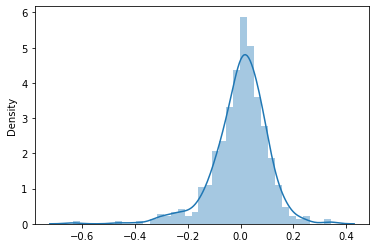

In [91]:
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred
sns.distplot(res)

###Observation:
Validates the assumption

###Check for **constant variance of error terms**

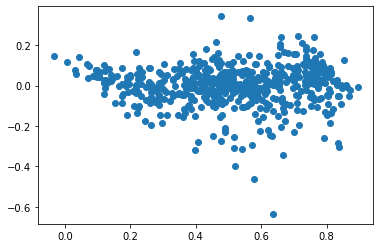

In [92]:
plt.scatter(y_train_pred,res)
plt.plot()
plt.show()

###Observation:
Validates the assumption

#Scaling Test Data

In [93]:
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])

#X_Test and Y_test

In [94]:
y_test = bike_test.pop('cnt')
X_test = bike_test

#Prediction on test model

##Add Constant on X_test

In [95]:
keyVariables = ['yr', 'holiday', 'atemp', 'windspeed', 'IsSummer', 'IsWinter','IsWeatherOk', 'IsAug', 'IsSep']
X_test_sm = sm.add_constant(X_test[keyVariables])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


##Predict on y_test

In [96]:
y_test_pred = lr_model.predict(X_test_sm)

#Evaluate Model

In [97]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.745711791720087

#Conclusion Post Manual Model building approach



1.   r2score of 0.74 while evaluating the model indicate a good fitting model on test data as well
2.   These are the key variables that boombike need to give more focus

Below is the equation that came up after executing the manual approach for model building

y = 0.1129 + (0.2378	* yr) + (-0.0985	holiday) + (0.5511 * atemp) +(-0.1523 *	windspeed) + (0.1018 *	IsSummer) + (0.127 *	IsWinter) + 
(-0.0695 * IsWeatherOk) + (0.07	* IsAug) + (0.1105	* IsSep)
    
    'yr' - as the company grows we can expect more usage and more revenue in future
    'holiday' - holidays on weekdays sees a decline.So, have discounts during such holidays falling on weekdays
    'atemp' - temperature has a direct and strong impact on count of boombike users.Target your marketing accordingly
    'windspeed' - windspeed impacts the weather.Higher the windspeed, bad is the weather, negative correlation with boombike user counts.As,it has a direct and strong impact on count of boombike users.Target your marketing accordingly
    'IsSummer' - Summer sees good count
    'IsWinter' - so, is winter
    'IsWeatherOk' - Good weather, higher the chances of usage, bad weather lesser the chances of bike usage
    'IsAug' - Aug shows decent count
    'IsSep' - Sep, too has decent count



#2. Train and Build Models (**Using RFE Feature selection approach**)




##**Model#1**

## we are feeding 23 variables from the dataset to the RFE function to give us the top 15 columns

In [98]:
KeyVariablesForRFE = ['yr', 'holiday','atemp', 'hum',
       'windspeed','IsLongWeekend','IsWeekend', 'IsSpring',
       'IsSummer', 'IsWinter', 'IsWeatherGreat', 'IsWeatherOk',
       'IsAug', 'IsDec', 'IsFeb', 'IsJan', 'IsJul', 'IsJun', 'IsMar',
       'IsMay', 'IsNov', 'IsOct', 'IsSep']
X_train[KeyVariablesForRFE].columns

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'IsLongWeekend',
       'IsWeekend', 'IsSpring', 'IsSummer', 'IsWinter', 'IsWeatherGreat',
       'IsWeatherOk', 'IsAug', 'IsDec', 'IsFeb', 'IsJan', 'IsJul', 'IsJun',
       'IsMar', 'IsMay', 'IsNov', 'IsOct', 'IsSep'],
      dtype='object')

In [99]:
lmRFE = LinearRegression()
lmRFE.fit(X_train[KeyVariablesForRFE],y_train)
rfe = RFE(lmRFE,n_features_to_select=15)
rfe = rfe.fit(X_train[KeyVariablesForRFE],y_train)
list(zip(X_train[KeyVariablesForRFE].columns,rfe.support_,rfe.ranking_))
col = X_train[KeyVariablesForRFE].columns[rfe.support_]
print(col)
X_train[KeyVariablesForRFE].columns[~rfe.support_]
X_train_rfe = X_train[col]
#X_train_rfe

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'IsLongWeekend',
       'IsSpring', 'IsSummer', 'IsWinter', 'IsWeatherGreat', 'IsWeatherOk',
       'IsAug', 'IsDec', 'IsNov', 'IsSep'],
      dtype='object')


##Top 15 columns:

'yr', 'holiday', 'atemp', 'hum', 'windspeed', 'IsLongWeekend',
       'IsSpring', 'IsSummer', 'IsWinter', 'IsWeatherGreat', 'IsWeatherOk',
       'IsAug', 'IsDec', 'IsNov', 'IsSep'

##Train and build the model after adding the constant

In [100]:
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
#lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          4.23e-202
Time:                        06:32:33   Log-Likelihood:                 546.47
No. Observations:                 547   AIC:                            -1061.
Df Residuals:                     531   BIC:                            -992.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0513      0.046      1.105      0.270      -0.040       0.142
yr                 0.2300      0.008     29.271      0.000       0.215       0.245
holiday           -0.1020      0.024     -4.240      0.000      -0.149      -0.055
atemp              0.4957      0.034     14.424      0.000       0.428       0.563
hum               -0.1705      0.037     -4.585      0.000      -0.244      -0.097
windspeed         -0.1592      0.025     -6.387      0.000      -0.208      -0.110
IsLongWeekend     -0.1331      0.092     -1.454      0.146      -0.313       0.047
IsSpring          -0.0571      0.021     -2.699      0.007      -0.099      -0.016
IsSummer           0.0698      0.016      4.413      0.000       0.039       0.101
IsWinter           0.1293      0.018      7.258      0.000       0.094       0.164
IsWeatherGreat     0.2399      0.026      9.060      0.000       0.188       0.292
IsWeatherOk        0.1851      0.025      7.377      0.000       0.136       0.234
IsAug              0.0487      0.017      2.788      0.005       0.014       0.083
IsDec             -0.0361      0.016     -2.266      0.024      -0.067      -0.005
IsNov             -0.0412      0.018     -2.259      0.024      -0.077      -0.005
IsSep              0.1029      0.017      6.012      0.000       0.069       0.137
==============================================================================
Omnibus:                       73.222   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.122
Skew:                          -0.654   Prob(JB):                     2.87e-45
Kurtosis:                       5.700   Cond. No.                         39.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,26.06
2,atemp,21.02
9,IsWeatherGreat,15.99
10,IsWeatherOk,9.96
6,IsSpring,6.37
8,IsWinter,4.71
4,windspeed,4.51
7,IsSummer,3.74
0,yr,2.09
11,IsAug,1.87


###Observation:
Drop IsLongWeekend as it has high p value (> 0.05)

## **Model#2**
Drop IsLongWeekend

In [102]:
#X = X.drop('hum', axis = 1)
X = X_train_rfe.drop('IsLongWeekend', axis = 1)

In [103]:
X.columns

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'IsSpring', 'IsSummer',
       'IsWinter', 'IsWeatherGreat', 'IsWeatherOk', 'IsAug', 'IsDec', 'IsNov',
       'IsSep'],
      dtype='object')

In [104]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
#lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          8.33e-203
Time:                        06:32:34   Log-Likelihood:                 545.39
No. Observations:                 547   AIC:                            -1061.
Df Residuals:                     532   BIC:                            -996.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0481      0.046      1.037      0.300      -0.043       0.139
yr                 0.2296      0.008     29.210      0.000       0.214       0.245
holiday           -0.1019      0.024     -4.231      0.000      -0.149      -0.055
atemp              0.4933      0.034     14.355      0.000       0.426       0.561
hum               -0.1673      0.037     -4.501      0.000      -0.240      -0.094
windspeed         -0.1582      0.025     -6.345      0.000      -0.207      -0.109
IsSpring          -0.0560      0.021     -2.646      0.008      -0.098      -0.014
IsSummer           0.0714      0.016      4.525      0.000       0.040       0.102
IsWinter           0.1305      0.018      7.325      0.000       0.096       0.166
IsWeatherGreat     0.2407      0.027      9.081      0.000       0.189       0.293
IsWeatherOk        0.1855      0.025      7.385      0.000       0.136       0.235
IsAug              0.0507      0.017      2.914      0.004       0.017       0.085
IsDec             -0.0363      0.016     -2.271      0.024      -0.068      -0.005
IsNov             -0.0412      0.018     -2.257      0.024      -0.077      -0.005
IsSep              0.1044      0.017      6.103      0.000       0.071       0.138
==============================================================================
Omnibus:                       71.389   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.909
Skew:                          -0.643   Prob(JB):                     1.74e-43
Kurtosis:                       5.643   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,26.02
2,atemp,20.92
8,IsWeatherGreat,15.99
9,IsWeatherOk,9.95
5,IsSpring,6.36
7,IsWinter,4.70
4,windspeed,4.51
6,IsSummer,3.72
0,yr,2.08
10,IsAug,1.85


###Observation:
Drop humidity (hum) as it has high VIF value (> 10)

## **Model#3**
Drop hum (humidity)

In [106]:
X = X.drop('hum', axis = 1)
#X = X_train_rfe.drop('hum', axis = 1)

In [107]:
X.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'IsSpring', 'IsSummer',
       'IsWinter', 'IsWeatherGreat', 'IsWeatherOk', 'IsAug', 'IsDec', 'IsNov',
       'IsSep'],
      dtype='object')

In [108]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
#lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     209.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.12e-199
Time:                        06:32:34   Log-Likelihood:                 535.17
No. Observations:                 547   AIC:                            -1042.
Df Residuals:                     533   BIC:                            -982.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0780      0.038     -2.070      0.039      -0.152      -0.004
yr                 0.2339      0.008     29.453      0.000       0.218       0.250
holiday           -0.1025      0.025     -4.179      0.000      -0.151      -0.054
atemp              0.4552      0.034     13.427      0.000       0.389       0.522
windspeed         -0.1283      0.024     -5.244      0.000      -0.176      -0.080
IsSpring          -0.0685      0.021     -3.207      0.001      -0.110      -0.027
IsSummer           0.0626      0.016      3.926      0.000       0.031       0.094
IsWinter           0.1148      0.018      6.456      0.000       0.080       0.150
IsWeatherGreat     0.2875      0.025     11.584      0.000       0.239       0.336
IsWeatherOk        0.2057      0.025      8.174      0.000       0.156       0.255
IsAug              0.0451      0.018      2.549      0.011       0.010       0.080
IsDec             -0.0425      0.016     -2.625      0.009      -0.074      -0.011
IsNov             -0.0422      0.019     -2.270      0.024      -0.079      -0.006
IsSep              0.0947      0.017      5.480      0.000       0.061       0.129
==============================================================================
Omnibus:                       73.528   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.473
Skew:                          -0.669   Prob(JB):                     7.98e-44
Kurtosis:                       5.630   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,IsWeatherGreat,15.98
2,atemp,12.64
8,IsWeatherOk,9.32
4,IsSpring,4.58
3,windspeed,4.50
6,IsWinter,3.52
5,IsSummer,3.14
0,yr,2.07
9,IsAug,1.79
11,IsNov,1.79


###Observation:
Drop IsNOv as it has high p value (> 0.05)

## **Model#4**
Drop IsNov

In [110]:
X = X.drop('IsNov', axis = 1)

In [111]:
X.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'IsSpring', 'IsSummer',
       'IsWinter', 'IsWeatherGreat', 'IsWeatherOk', 'IsAug', 'IsDec', 'IsSep'],
      dtype='object')

In [112]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
#lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     224.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          9.42e-200
Time:                        06:32:34   Log-Likelihood:                 532.54
No. Observations:                 547   AIC:                            -1039.
Df Residuals:                     534   BIC:                            -983.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0903      0.037     -2.411      0.016      -0.164      -0.017
yr                 0.2341      0.008     29.362      0.000       0.218       0.250
holiday           -0.1090      0.024     -4.459      0.000      -0.157      -0.061
atemp              0.4733      0.033     14.308      0.000       0.408       0.538
windspeed         -0.1288      0.025     -5.245      0.000      -0.177      -0.081
IsSpring          -0.0590      0.021     -2.807      0.005      -0.100      -0.018
IsSummer           0.0682      0.016      4.309      0.000       0.037       0.099
IsWinter           0.1050      0.017      6.064      0.000       0.071       0.139
IsWeatherGreat     0.2836      0.025     11.410      0.000       0.235       0.332
IsWeatherOk        0.2027      0.025      8.035      0.000       0.153       0.252
IsAug              0.0474      0.018      2.677      0.008       0.013       0.082
IsDec             -0.0294      0.015     -1.936      0.053      -0.059       0.000
IsSep              0.1008      0.017      5.887      0.000       0.067       0.134
==============================================================================
Omnibus:                       67.092   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.459
Skew:                          -0.630   Prob(JB):                     9.67e-38
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,IsWeatherGreat,15.38
2,atemp,12.19
8,IsWeatherOk,9.05
4,IsSpring,4.50
3,windspeed,4.49
5,IsSummer,3.11
6,IsWinter,2.99
0,yr,2.07
9,IsAug,1.79
11,IsSep,1.42


###Observation:
Drop IsWeatherGreat as it has high VIF value (> 10)

## **Model#5**
Drop IsWeatherGreat

In [114]:
X = X.drop('IsWeatherGreat', axis = 1)

In [115]:
X.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'IsSpring', 'IsSummer',
       'IsWinter', 'IsWeatherOk', 'IsAug', 'IsDec', 'IsSep'],
      dtype='object')

In [116]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
#lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.04e-175
Time:                        06:32:34   Log-Likelihood:                 472.87
No. Observations:                 547   AIC:                            -921.7
Df Residuals:                     535   BIC:                            -870.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1714      0.033      5.199      0.000       0.107       0.236
yr              0.2389      0.009     26.929      0.000       0.221       0.256
holiday        -0.0972      0.027     -3.573      0.000      -0.151      -0.044
atemp           0.4938      0.037     13.418      0.000       0.422       0.566
windspeed      -0.1548      0.027     -5.682      0.000      -0.208      -0.101
IsSpring       -0.0456      0.023     -1.949      0.052      -0.092       0.000
IsSummer        0.0759      0.018      4.313      0.000       0.041       0.111
IsWinter        0.0997      0.019      5.165      0.000       0.062       0.138
IsWeatherOk    -0.0686      0.009     -7.317      0.000      -0.087      -0.050
IsAug           0.0540      0.020      2.737      0.006       0.015       0.093
IsDec          -0.0214      0.017     -1.266      0.206      -0.055       0.012
IsSep           0.0958      0.019      5.020      0.000       0.058       0.133
==============================================================================
Omnibus:                      145.477   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              576.575
Skew:                          -1.160   Prob(JB):                    6.28e-126
Kurtosis:                       7.463   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.04
3,windspeed,4.39
5,IsSummer,2.45
4,IsSpring,2.29
6,IsWinter,2.11
0,yr,2.06
8,IsAug,1.71
7,IsWeatherOk,1.57
10,IsSep,1.39
9,IsDec,1.25


###Observation:
Drop IsDec as it has high p value (> 0.05)

## **Model#6**
Drop IsDec

In [118]:
X = X.drop('IsDec', axis = 1)

In [119]:
X.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'IsSpring', 'IsSummer',
       'IsWinter', 'IsWeatherOk', 'IsAug', 'IsSep'],
      dtype='object')

In [120]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
#lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     206.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.56e-176
Time:                        06:32:34   Log-Likelihood:                 472.05
No. Observations:                 547   AIC:                            -922.1
Df Residuals:                     536   BIC:                            -874.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1637      0.032      5.049      0.000       0.100       0.227
yr              0.2388      0.009     26.905      0.000       0.221       0.256
holiday        -0.0973      0.027     -3.572      0.000      -0.151      -0.044
atemp           0.5019      0.036     13.840      0.000       0.431       0.573
windspeed      -0.1515      0.027     -5.582      0.000      -0.205      -0.098
IsSpring       -0.0440      0.023     -1.882      0.060      -0.090       0.002
IsSummer        0.0779      0.018      4.440      0.000       0.043       0.112
IsWinter        0.0978      0.019      5.079      0.000       0.060       0.136
IsWeatherOk    -0.0687      0.009     -7.316      0.000      -0.087      -0.050
IsAug           0.0548      0.020      2.778      0.006       0.016       0.094
IsSep           0.0978      0.019      5.138      0.000       0.060       0.135
==============================================================================
Omnibus:                      142.977   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              557.946
Skew:                          -1.144   Prob(JB):                    6.97e-122
Kurtosis:                       7.387   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.04
3,windspeed,4.38
5,IsSummer,2.45
4,IsSpring,2.22
0,yr,2.05
6,IsWinter,1.89
8,IsAug,1.70
7,IsWeatherOk,1.57
9,IsSep,1.39
1,holiday,1.04


###Observation:
Drop IsSpring as it has high p value (> 0.05)

## **Model#7**
Drop IsSpring

In [122]:
X = X.drop('IsSpring', axis = 1)

In [123]:
X.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'IsSummer', 'IsWinter',
       'IsWeatherOk', 'IsAug', 'IsSep'],
      dtype='object')

In [124]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
#lr_model.params
lr_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     227.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          5.84e-177
Time:                        06:32:34   Log-Likelihood:                 470.25
No. Observations:                 547   AIC:                            -920.5
Df Residuals:                     537   BIC:                            -877.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1129      0.018      6.274      0.000       0.078       0.148
yr              0.2378      0.009     26.776      0.000       0.220       0.255
holiday        -0.0985      0.027     -3.611      0.000      -0.152      -0.045
atemp           0.5511      0.025     21.860      0.000       0.502       0.601
windspeed      -0.1523      0.027     -5.600      0.000      -0.206      -0.099
IsSummer        0.1018      0.012      8.371      0.000       0.078       0.126
IsWinter        0.1270      0.011     11.129      0.000       0.105       0.149
IsWeatherOk    -0.0695      0.009     -7.399      0.000      -0.088      -0.051
IsAug           0.0700      0.018      3.876      0.000       0.035       0.105
IsSep           0.1105      0.018      6.198      0.000       0.075       0.145
==============================================================================
Omnibus:                      134.886   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              512.365
Skew:                          -1.084   Prob(JB):                    5.51e-112
Kurtosis:                       7.216   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.04
3,windspeed,2.97
0,yr,1.98
4,IsSummer,1.85
7,IsAug,1.54
5,IsWinter,1.48
6,IsWeatherOk,1.48
8,IsSep,1.31
1,holiday,1.04


###Observation
We are ok with the p values and the VIF values.
atemp is marginally higher than 5 but removing it changed the R2 and adjusted square value to around 0.6.So, decided to have it in the model

Below is the final linear regression equation
y = 0.1129 + (0.2378	* yr) + (-0.0985	holiday) + (0.5511 * atemp) +(-0.1523 *	windspeed) + (0.1018 *	IsSummer) + (0.127 *	IsWinter) + 
(-0.0695 * IsWeatherOk) + (0.07	* IsAug) + (0.1105	* IsSep)

#**Linear Regression Equation:**

y = 0.1129 + (0.2378	* yr) + (-0.0985	holiday) + (0.5511 * atemp) +(-0.1523 *	windspeed) + (0.1018 *	IsSummer) + (0.127 *	IsWinter) + 
(-0.0695 * IsWeatherOk) + (0.07	* IsAug) + (0.1105	* IsSep)

#Residual Analysis for the Model built through RFE Approach



###Check for **normal distribution of error terms** and **zero mean for residual terms**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


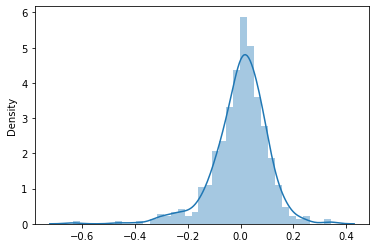

In [126]:
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred
sns.distplot(res)

###Observation:
Validates the assumption

###Check for **constant variance of error terms**

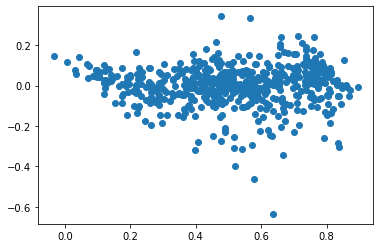

In [127]:
plt.scatter(y_train_pred,res)
plt.plot()
plt.show()

###Observation:
Validates the assumption

#Scaling of Test data set and creation of X_test and y_test was already done during manual method, so no need to repeat the steps

#Prediction on test model

##Add Constant on X_test

In [128]:
keyVariables = ['yr', 'holiday', 'atemp', 'windspeed', 'IsSummer', 'IsWinter','IsWeatherOk', 'IsAug', 'IsSep']
X_test_sm = sm.add_constant(X_test[keyVariables])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


##Predict on y_test

In [129]:
y_test_pred = lr_model.predict(X_test_sm)

#Evaluate Model

In [130]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.745711791720087

#Observation:

Both manual and RFE approach gave identical models and equations

#Conclusion Post RFE Model building approach



1.   r2score of 0.74 while evaluating the model indicate a good fitting model on test data as well
2.   These are the key variables that boombike need to give more focus

Below is the equation that came up after executing the manual approach for model building

y = 0.1129 + (0.2378	* yr) + (-0.0985	holiday) + (0.5511 * atemp) +(-0.1523 *	windspeed) + (0.1018 *	IsSummer) + (0.127 *	IsWinter) + 
(-0.0695 * IsWeatherOk) + (0.07	* IsAug) + (0.1105	* IsSep)
    
    'yr' - as the company grows we can expect more usage and more revenue in future
    'holiday' - holidays on weekdays sees a decline.So, have discounts during such holidays falling on weekdays
    'atemp' - temperature has a direct and strong impact on count of boombike users.Target your marketing accordingly
    'windspeed' - windspeed impacts the weather.Higher the windspeed, bad is the weather, negative correlation with boombike user counts.As,it has a direct and strong impact on count of boombike users.Target your marketing accordingly
    'IsSummer' - Summer sees good count
    'IsWinter' - so, is winter
    'IsWeatherOk' - Good weather, higher the chances of usage, bad weather lesser the chances of bike usage
    'IsAug' - Aug shows decent count
    'IsSep' - Sep, too has decent count

